In [164]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

### Описание атрибутов

#### cnt_no
Уникальный идентификатор контейнера.

#### cnt_size
Размер контейнера (например, 20, 40).

#### cnt_iso
ISO код контейнера, описывающий его тип и размеры (например, 45G1).

#### cnt_type
Тип контейнера (например, DRY для сухих грузов).

#### cnt_length
Длина контейнера (например, 40.0).

#### is_laden
Статус загрузки контейнера (например, груженый или пустой).

#### receive_datetime
Дата и время приема контейнера на терминал (например, 2023-12-24T15:05:05.000Z).

#### receive_date
Дата приема контейнера на терминал (например, 2023-12-25).

#### warehouse_procedure_closed
Дата и время завершения складской процедуры (например, 0001-12-29T14:00:00.000Z).

#### departure_datetime
Дата и время отправки контейнера с терминала (например, 2024-01-08T21:11:00.000Z).

#### departure_date
Дата отправки контейнера с терминала (например, 2024-01-09).

#### departure_date_20_20
Дата отправки контейнера по плану 20-20 (например, 2024-01-09).

#### terminal_of_arrival
Терминал прибытия контейнера (например, УТ).

#### terminal_of_departure
Терминал отправления контейнера (например, УТ).

#### move_from
Тип транспорта, с которого контейнер был перемещен (например, ЖД).

#### move_from_direction
Направление перемещения контейнера (например, Прочее).

#### move_to
Тип транспорта, на который контейнер был перемещен (например, Море).

#### move_to_direction
Направление перемещения контейнера (например, Экспорт).

#### drt_direct_arrival
Прямое прибытие (например, Нет).

#### shipcall_receive
Код судозахода при получении контейнера (например, A GALAXY 019N/020S).

#### shipcall_departure
Код судозахода при отправке контейнера (например, A GALAXY 019N/020S).

#### line_service_arrival
Линия обслуживания при получении контейнера (например, None).

#### line_service_departure
Линия обслуживания при отправке контейнера (например, Трамповые (Ист Шиппинг Лайн)).

#### port_of_loading
Порт загрузки контейнера (например, нет данных).

#### country_of_loading
Страна загрузки контейнера (например, нет данных).

#### port_of_destination
Порт назначения контейнера (например, Тяньцзинь).

#### country_of_destination
Страна назначения контейнера (например, Китай).

#### rw_station_departure
Железнодорожная станция отправления контейнера (например, НОВОСИБ-ВОСТ).

#### received_cnt_wagon_owner
Владелец вагона, получившего контейнер (например, АО РЖД).

#### rw_station_destination
Железнодорожная станция назначения контейнера.

#### agent
Агент, ответственный за контейнер (например, ООО Логистика).

#### line_operator
Оператор линии, ответственный за контейнер (например, MSC).

#### counterparty_isct_name
Наименование контрагента по ИСЦТ (например, ИСЦТ Контрагент).

#### counterparty_erp_name
Наименование контрагента по ERP (например, ERP Контрагент).

#### manager_by_counterparty
Менеджер, ответственный за контрагента (например, Иван Иванов).

#### contract_no
Номер контракта (например, 123456).

#### contract_prefix
Префикс контракта (например, TED).

#### contract_expired
Дата истечения срока действия контракта (например, 2025-01-15).

#### contract_status
Статус контракта (например, Действует).

#### consignee
Грузополучатель контейнера (например, ООО Импорт).

#### consignee_original
Оригинальный грузополучатель контейнера (например, ООО Экспорт).

#### consignor
Грузоотправитель контейнера (например, ООО Поставщик).

#### import_consignor
Грузоотправитель при импорте (например, Импортный Поставщик).

#### cargo
Тип груза в контейнере (например, ГРЕЧИХА).

#### dangerous_class
Класс опасности груза (например, None).

#### is_dangerous
Статус опасности груза (например, Нет).

#### storage_days
Количество дней хранения контейнера на терминале.

#### teu
Единица измерения контейнера (например, 2 TEU).

In [165]:
data_frames = []
json_files = glob.glob('Данные по убытию ктк/*.json')
for file in json_files:
    data_frame = pd.read_json(file)
    data_frames.append(data_frame)
df = pd.concat(data_frames, ignore_index=True)

In [ ]:
df.head()

Дубликаты

In [167]:
df.shape

(631449, 48)

In [168]:
df.drop_duplicates()
df.shape

(631449, 48)

Убираем не информативные атрибуты

contract_no, cnt_no - идентификаторы, неинформативно

teu - коррелирует с cnt_size и iso

receive_datetime, departure_datetime - дублируют receive_date и departure_date с временем

In [169]:
df.drop(['cnt_no', 'teu', 'contract_no', 'receive_datetime', 'departure_datetime'], axis=1, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631449 entries, 0 to 631448
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   cnt_size                    631449 non-null  int64  
 1   cnt_iso                     631449 non-null  object 
 2   cnt_type                    631311 non-null  object 
 3   cnt_length                  631311 non-null  float64
 4   is_laden                    631449 non-null  object 
 5   receive_date                631449 non-null  object 
 6   warehouse_procedure_closed  631449 non-null  object 
 7   departure_date              631449 non-null  object 
 8   departure_date_20_20        631449 non-null  object 
 9   terminal_of_arrival         628504 non-null  object 
 10  terminal_of_departure       631449 non-null  object 
 11  move_from                   631445 non-null  object 
 12  move_from_direction         631449 non-null  object 
 13  move_to       

Исследование количественных переменных

In [171]:
df.describe()

,cnt_size,cnt_length,storage_days
count,631449.000000,631311.000000,631449.000000
mean,33.015081,33.019281,10.052617
std,9.534644,9.533645,9.314001
min,20.000000,0.000000,0.000000
25%,20.000000,20.000000,5.000000
50%,40.000000,40.000000,8.000000
75%,40.000000,40.000000,12.000000
max,40.000000,45.000000,1005.000000


In [172]:
df['cnt_length'].unique()

array([40., 20., nan, 45.,  0.])

cnt_size и cnt_length должны быть категориальными, тк представляют дискретные значения. Дальше их преобразуем

Исследование целевой переменной

<module 'matplotlib.pyplot' from 'C:\\Users\\MPiskaev\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

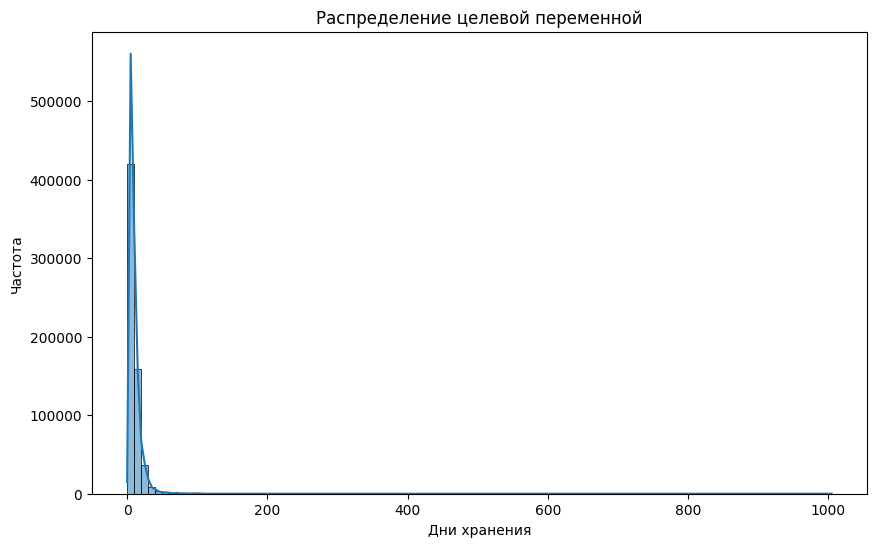

In [173]:
# Анализ распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(df['storage_days'], kde=True, bins=100)
plt.title('Распределение целевой переменной')
plt.xlabel('Дни хранения')
plt.ylabel('Частота')
plt

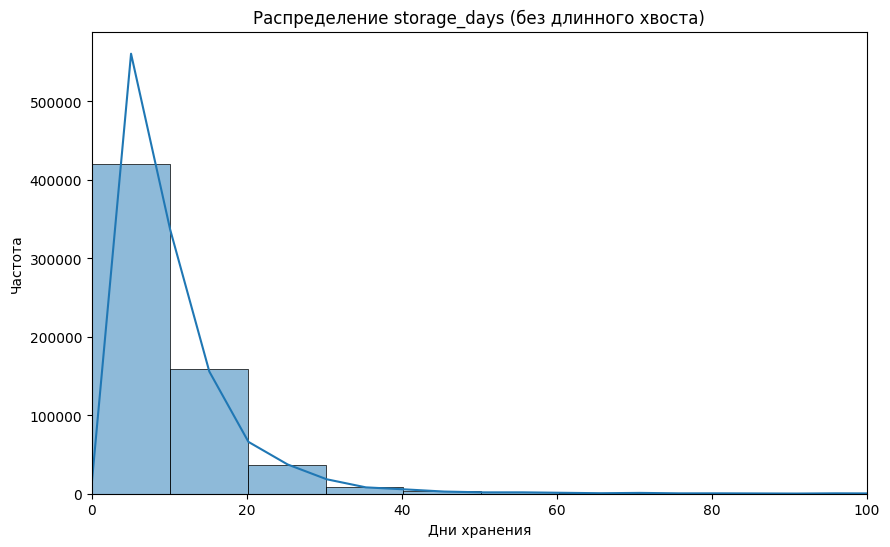

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(df['storage_days'], kde=True, bins=100)
plt.xlim(0, 100)  # Ограничиваем ось X для лучшей визуализации
plt.title('Распределение storage_days (без длинного хвоста)')
plt.xlabel('Дни хранения')
plt.ylabel('Частота')
plt.show()

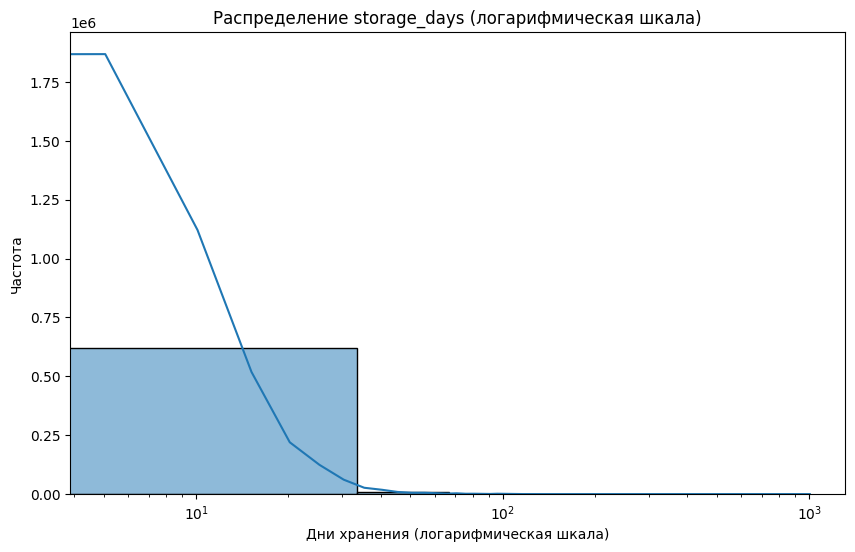

In [175]:
# Анализ распределения целевой переменной с логарифмической шкалой
plt.figure(figsize=(10, 6))
sns.histplot(df['storage_days'], kde=True, bins=30)
plt.xscale('log')  # Логарифмическая шкала
plt.title('Распределение storage_days (логарифмическая шкала)')
plt.xlabel('Дни хранения (логарифмическая шкала)')
plt.ylabel('Частота')
plt.show()

Выбросы

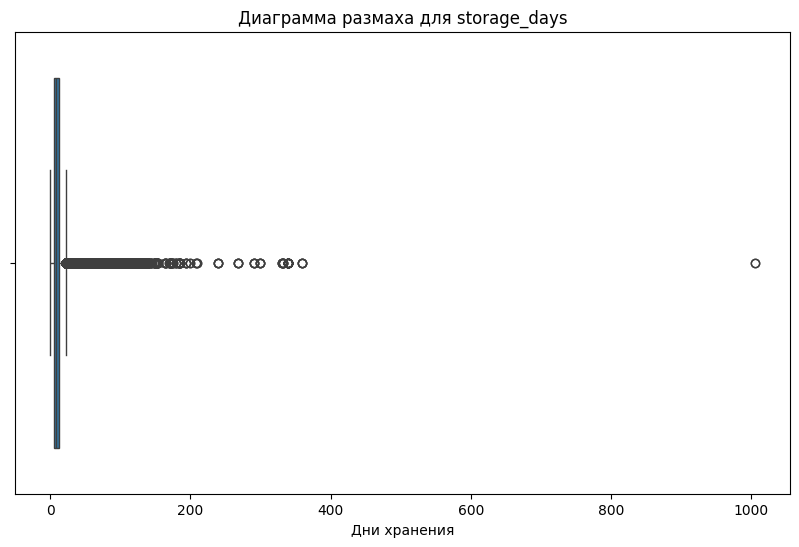

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['storage_days'])
plt.title('Диаграмма размаха для storage_days')
plt.xlabel('Дни хранения')
plt.show()

In [177]:

Q1 = df['storage_days'].quantile(0.25)
Q3 = df['storage_days'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['storage_days'] >= lower_bound) & (df['storage_days'] <= upper_bound)]

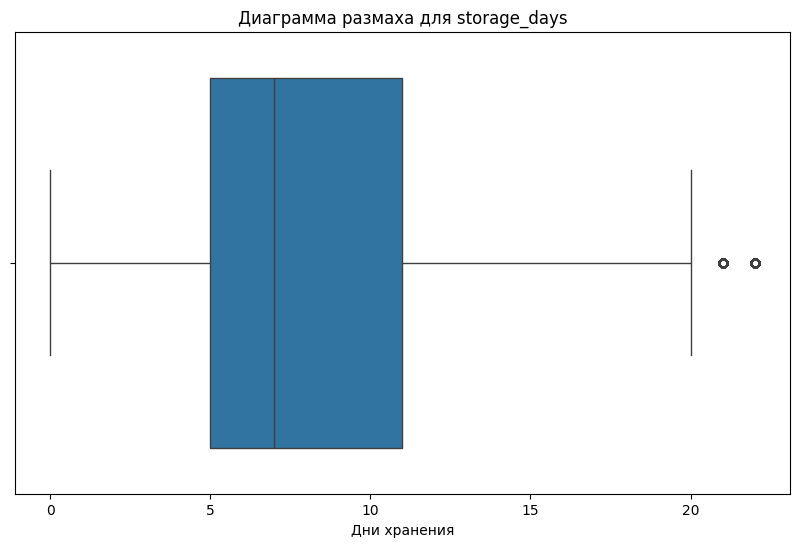

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['storage_days'])
plt.title('Диаграмма размаха для storage_days')
plt.xlabel('Дни хранения')
plt.show()

Нужно определить и отсеить ктк, которые прибыли после хранения

C:\Users\MPiskaev\AppData\Local\Temp\3\ipykernel_18624\579885179.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[['departure_date', 'storage_days']].set_index('departure_date').resample('M').mean().reset_index()


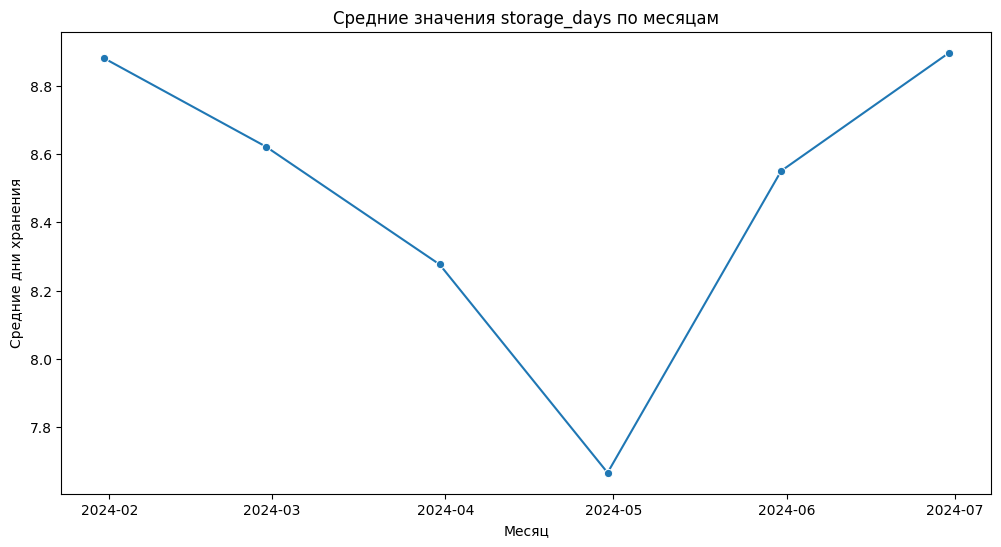

In [179]:

# Преобразование receive_date в формат datetime
df['departure_date'] = pd.to_datetime(df['departure_date'])

# Создание нового DataFrame для анализа по месяцам
df_monthly = df[['departure_date', 'storage_days']].set_index('departure_date').resample('M').mean().reset_index()

# Построение графика среднего значения storage_days по месяцам
plt.figure(figsize=(12, 6))
sns.lineplot(x='departure_date', y='storage_days', data=df_monthly, marker='o')
plt.title('Средние значения storage_days по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средние дни хранения')
plt.show()

Обработка дат

In [180]:
date_columns = ['receive_date', 'departure_date', 'departure_date_20_20', 'warehouse_procedure_closed', 'contract_expired']

for i in date_columns:
    df[i] = pd.to_datetime(df[i], errors='coerce')
    # Выделяем месяц, день, год и час
    df[f'month {i}'] = df[i].dt.month.astype('object')
    df[f'day {i}'] = df[i].dt.day.astype('object')
    df[f'year {i}'] = df[i].dt.year.astype('object')
    df.drop(i, axis=1, inplace=True)

C:\Users\MPiskaev\AppData\Local\Temp\3\ipykernel_18624\2799452482.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i] = pd.to_datetime(df[i], errors='coerce')


Анализ категориальных признаков

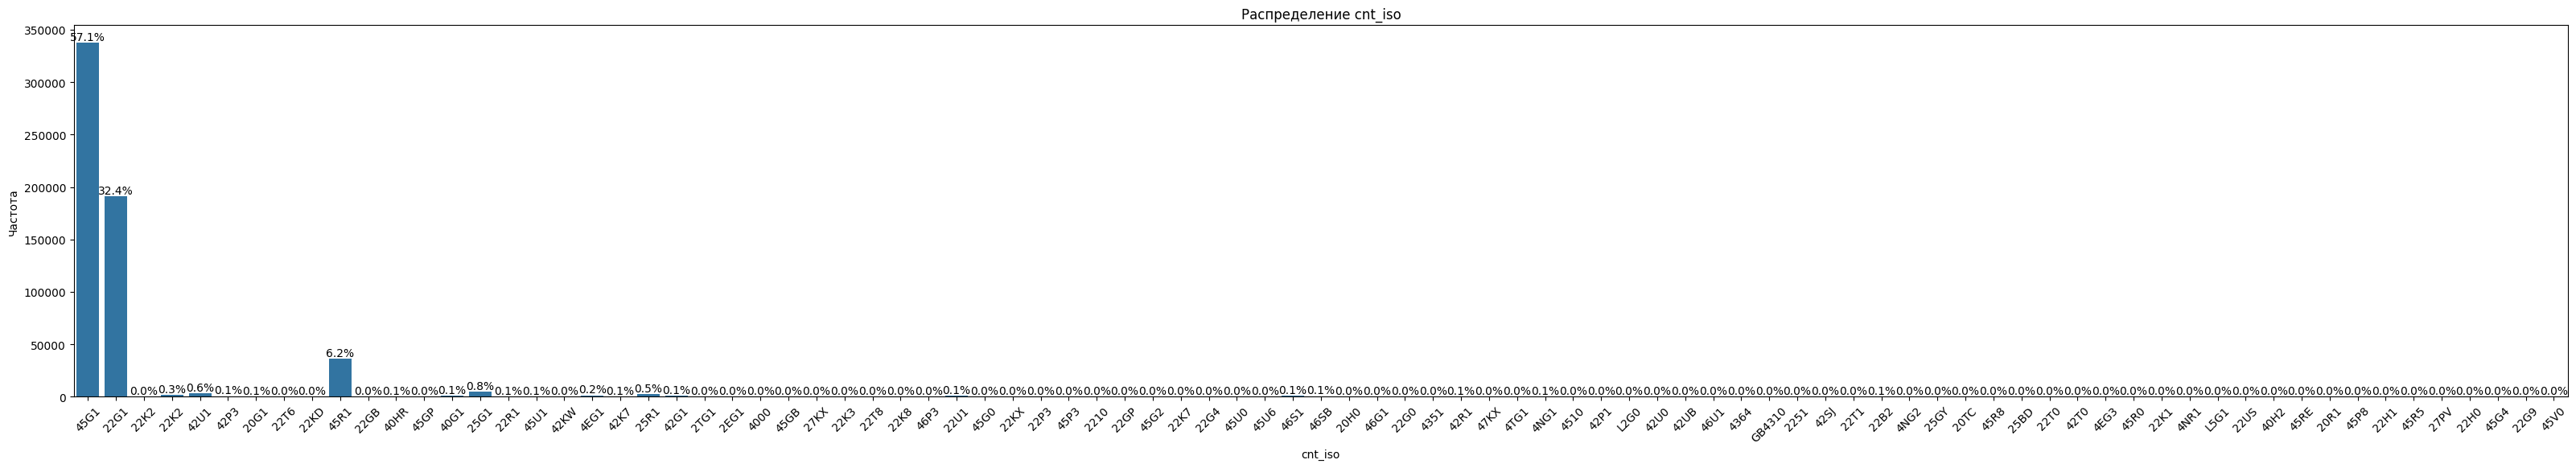

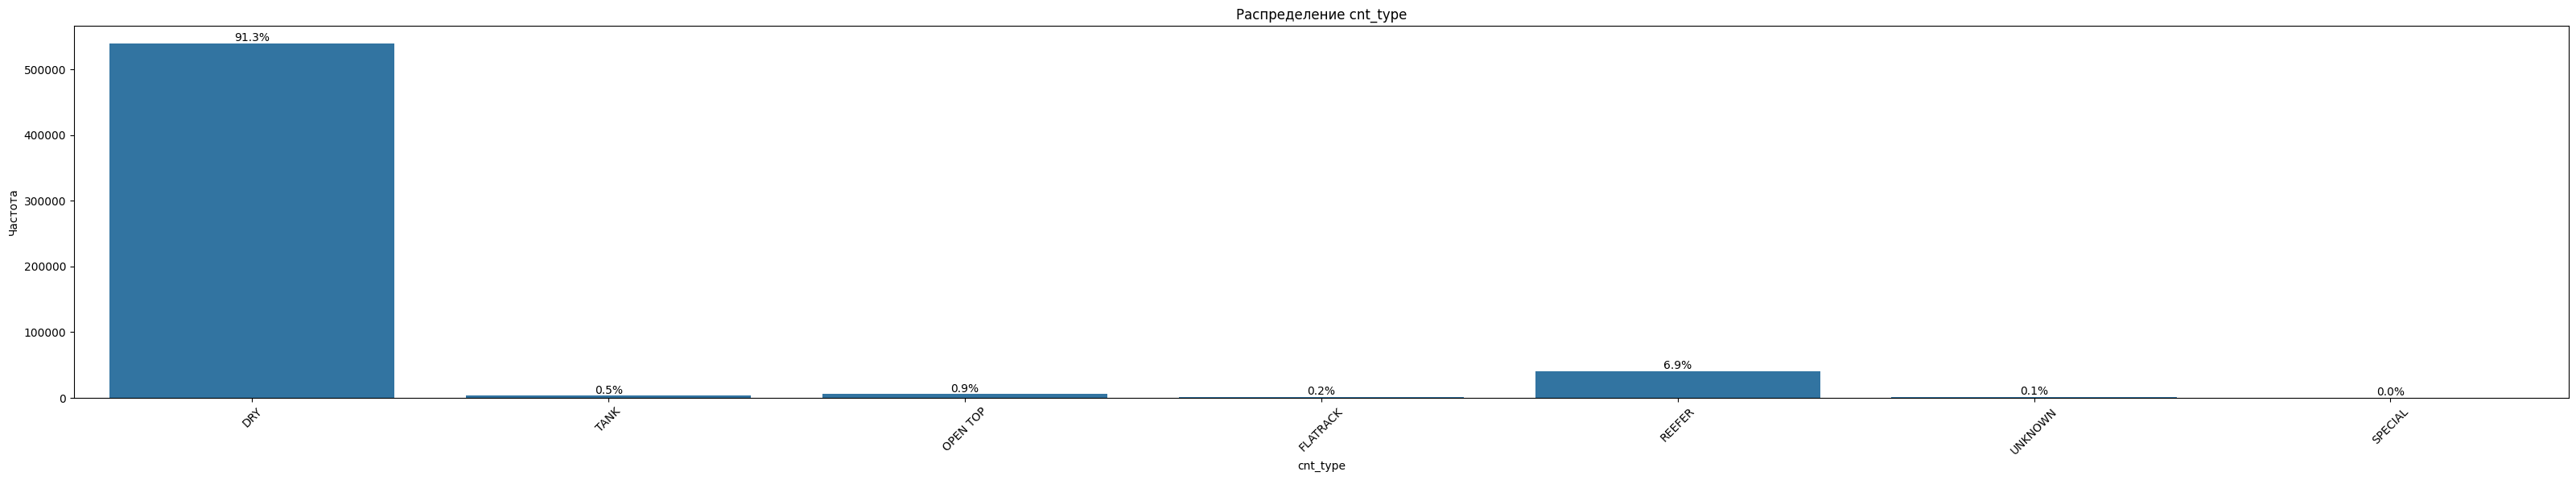

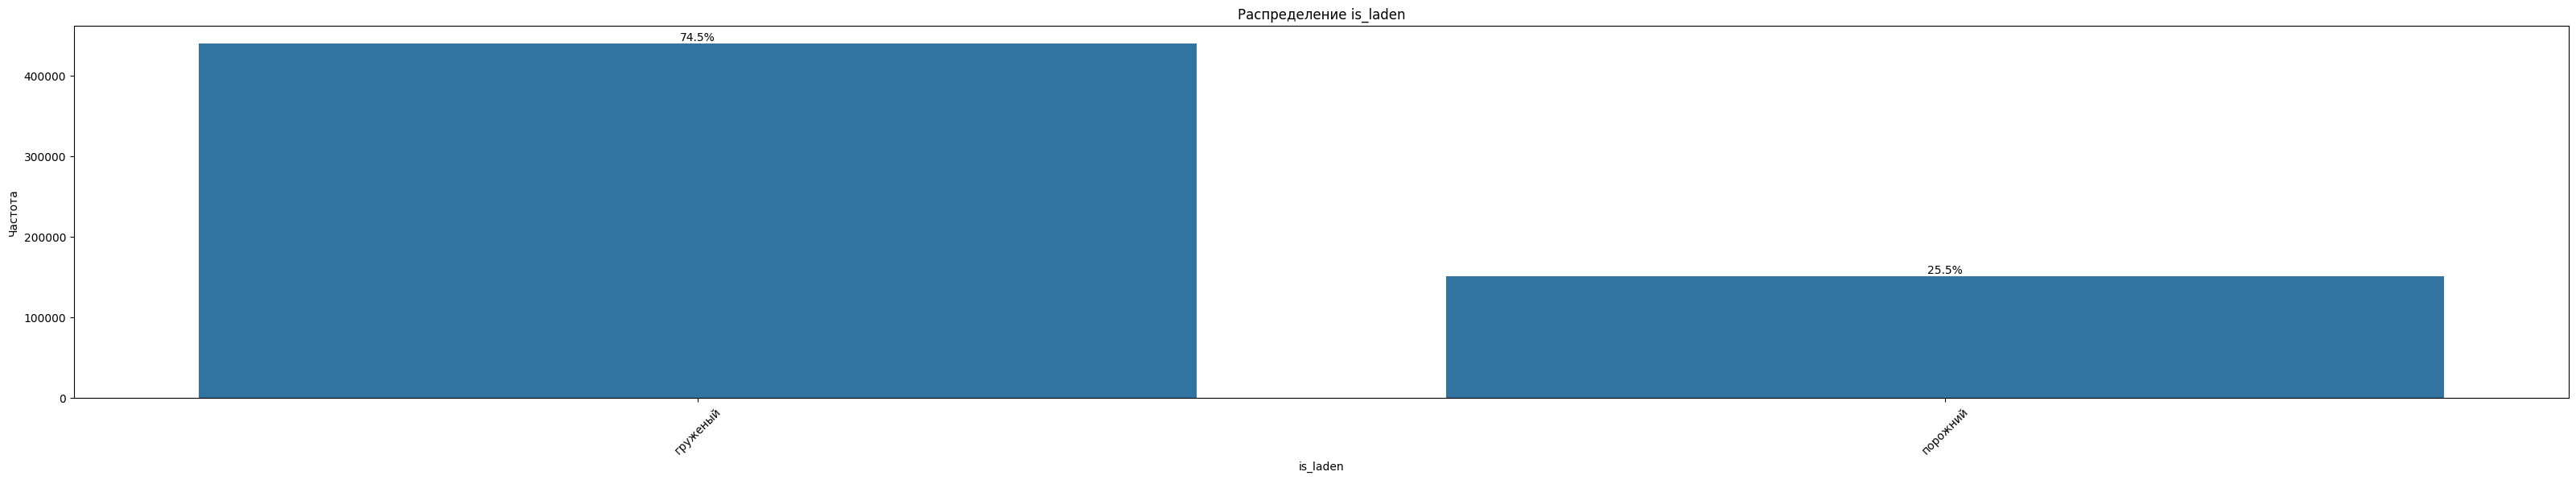

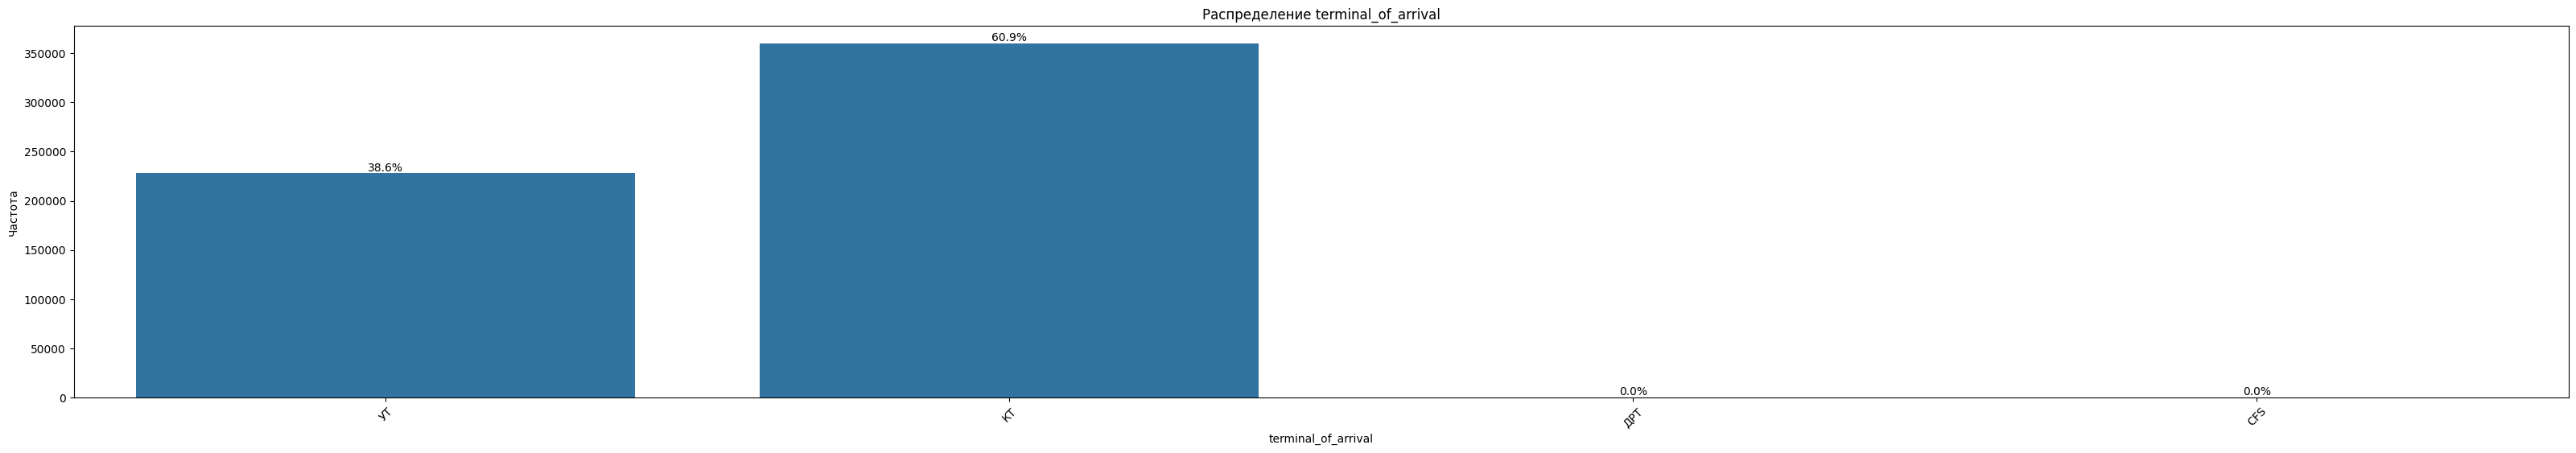

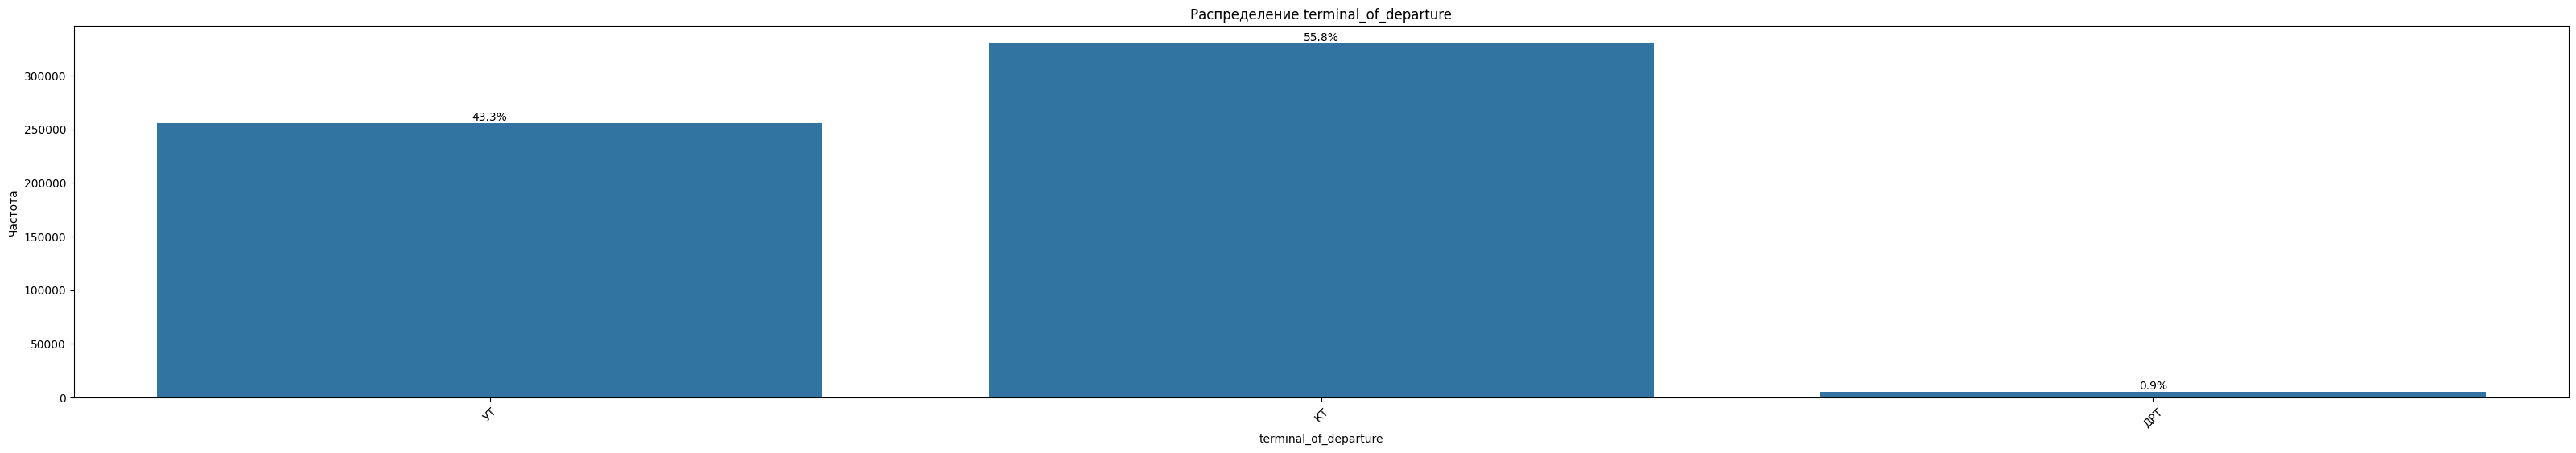

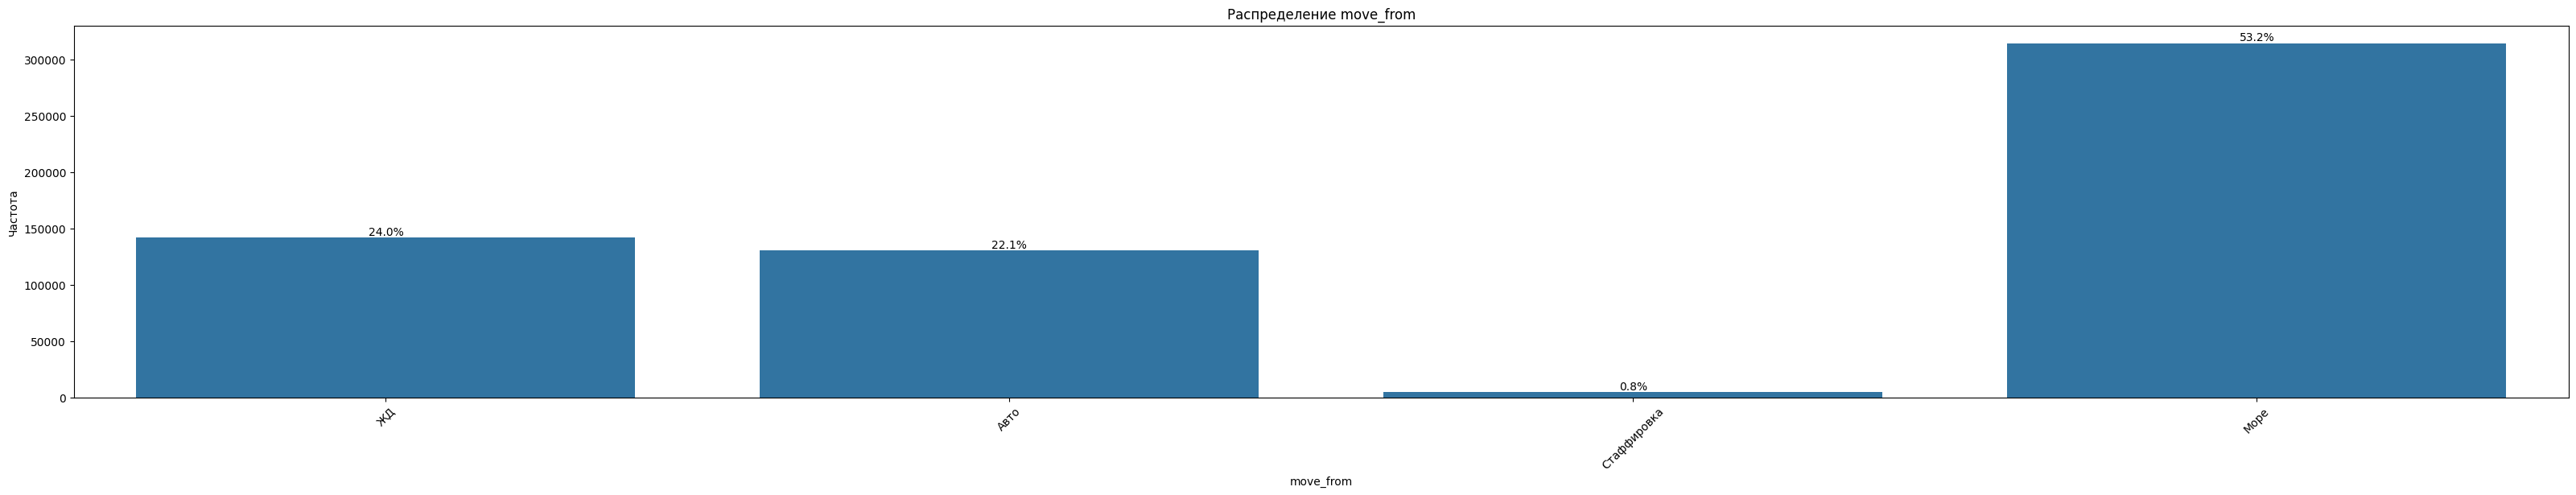

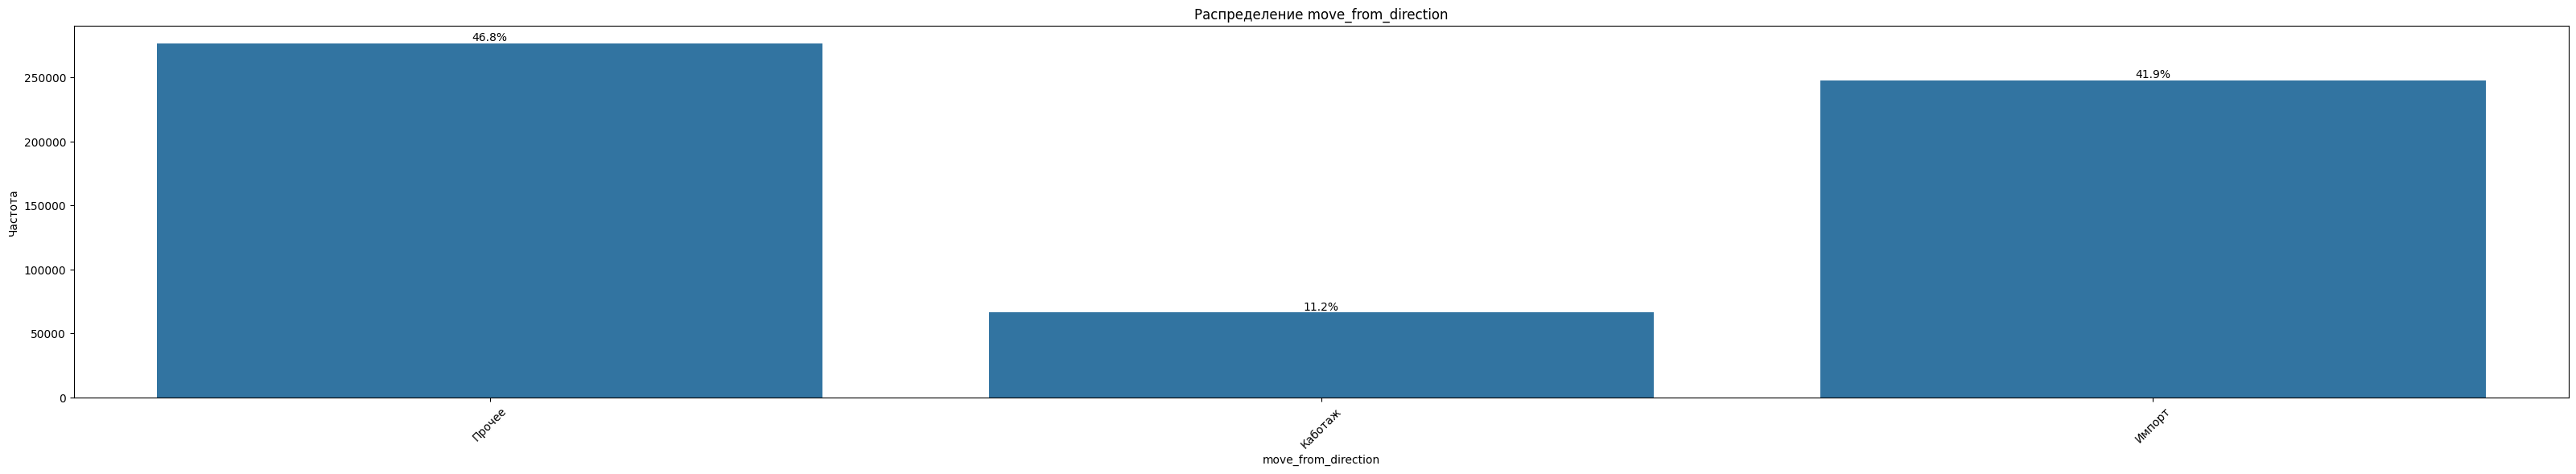

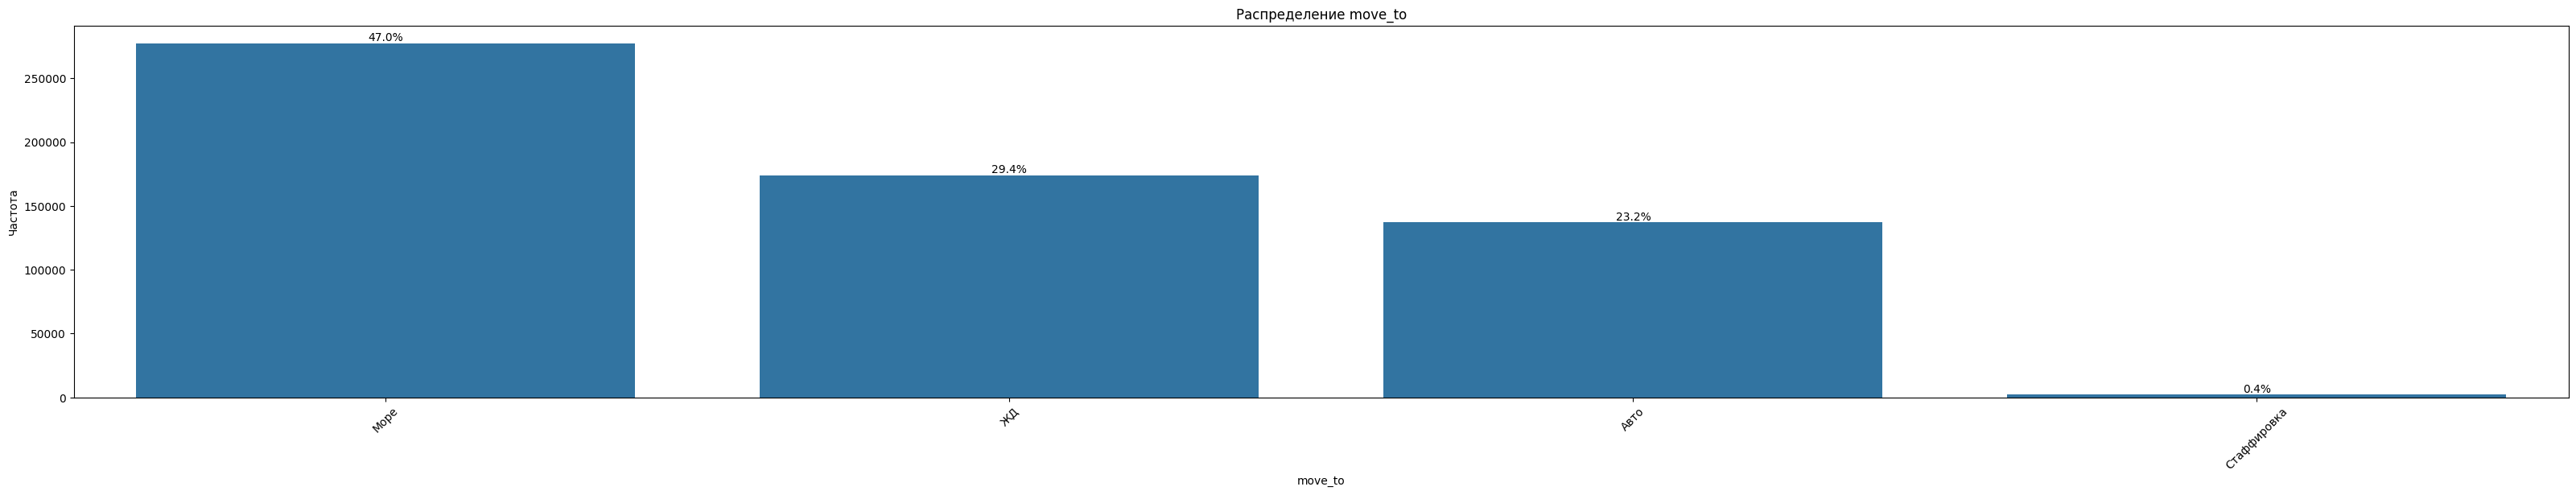

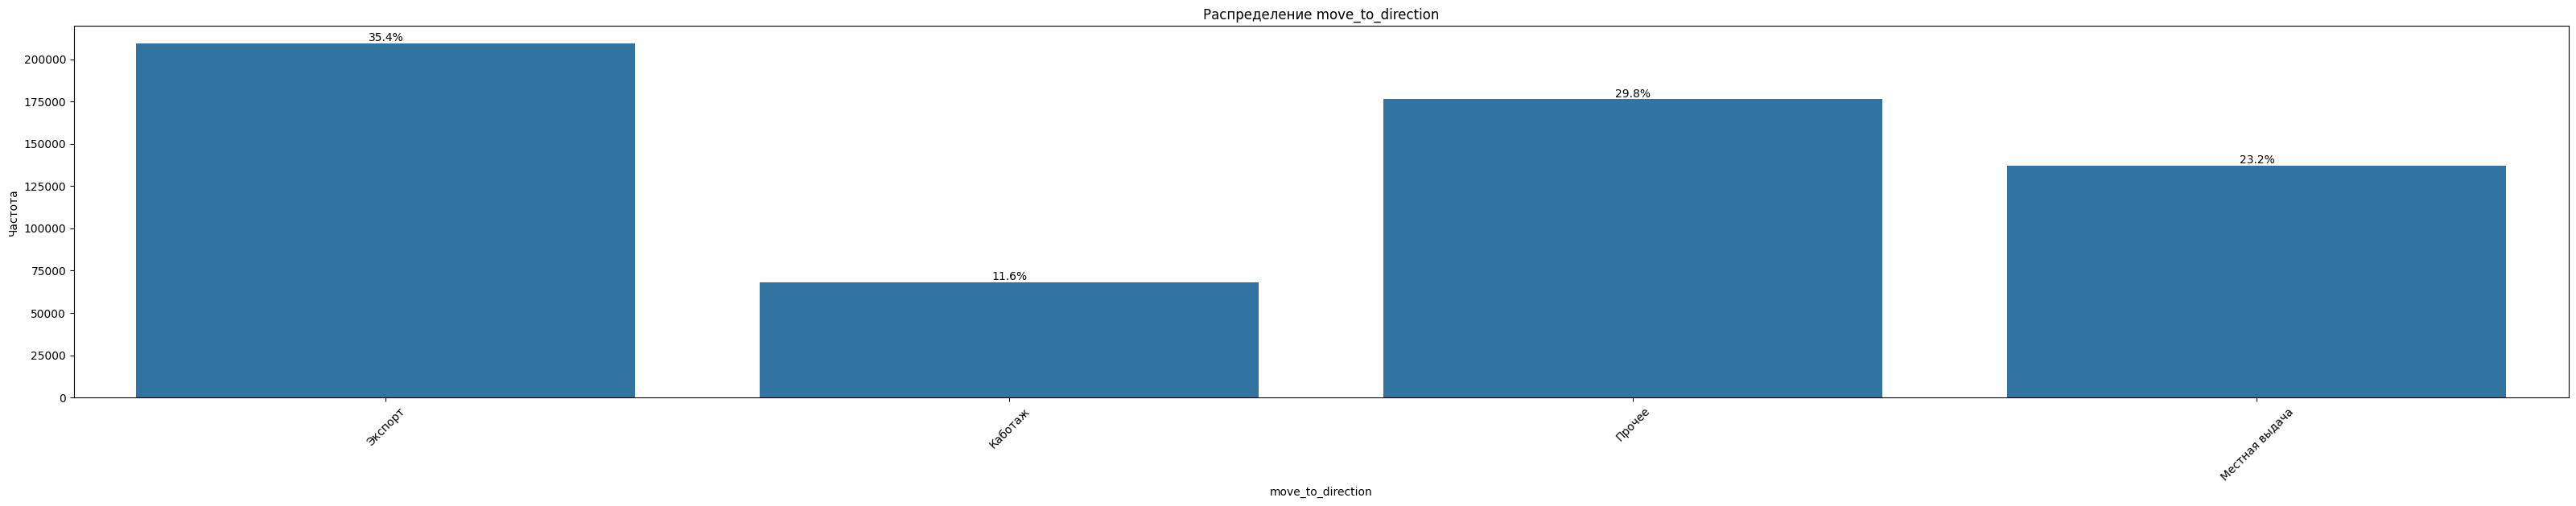

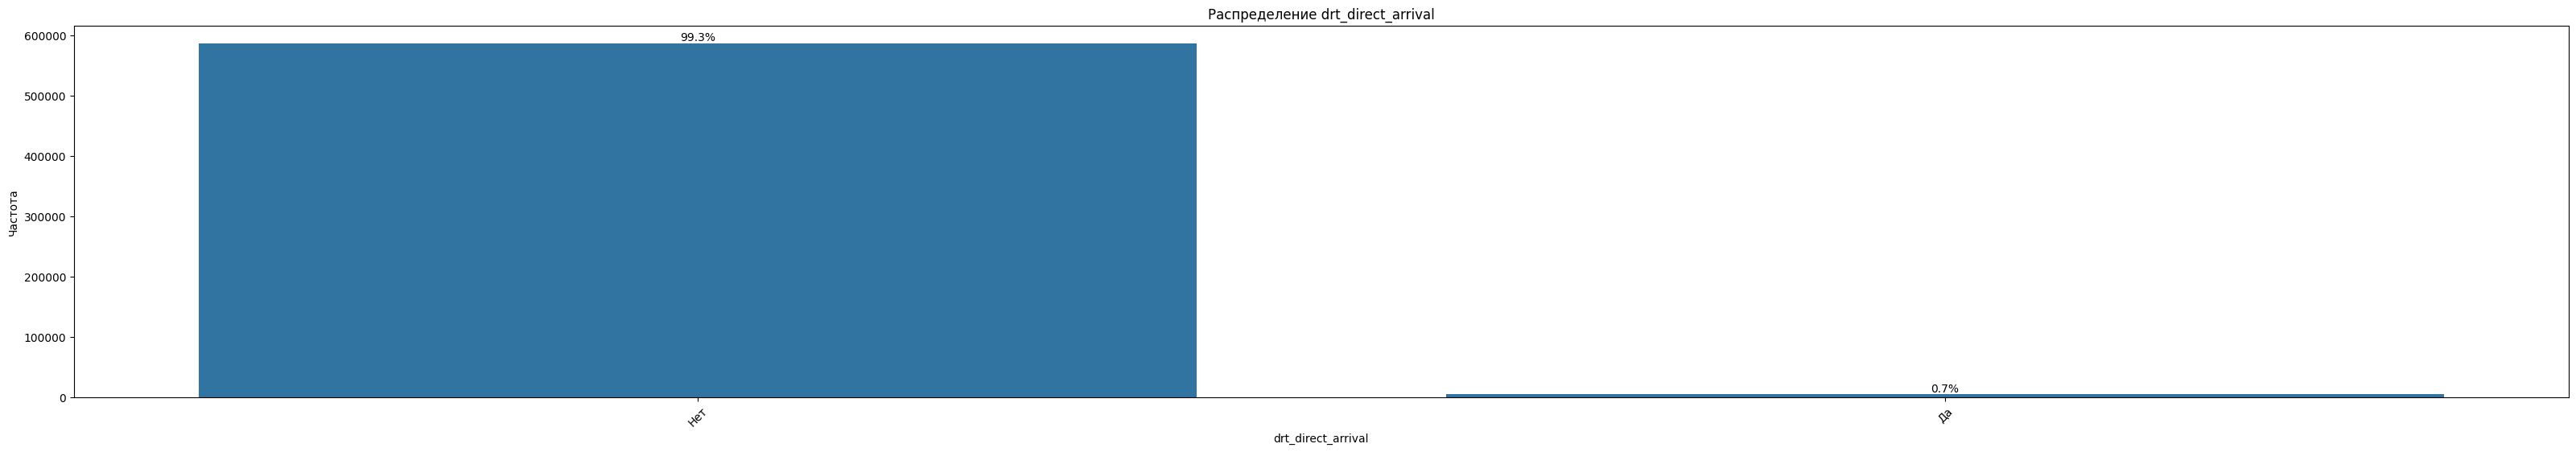

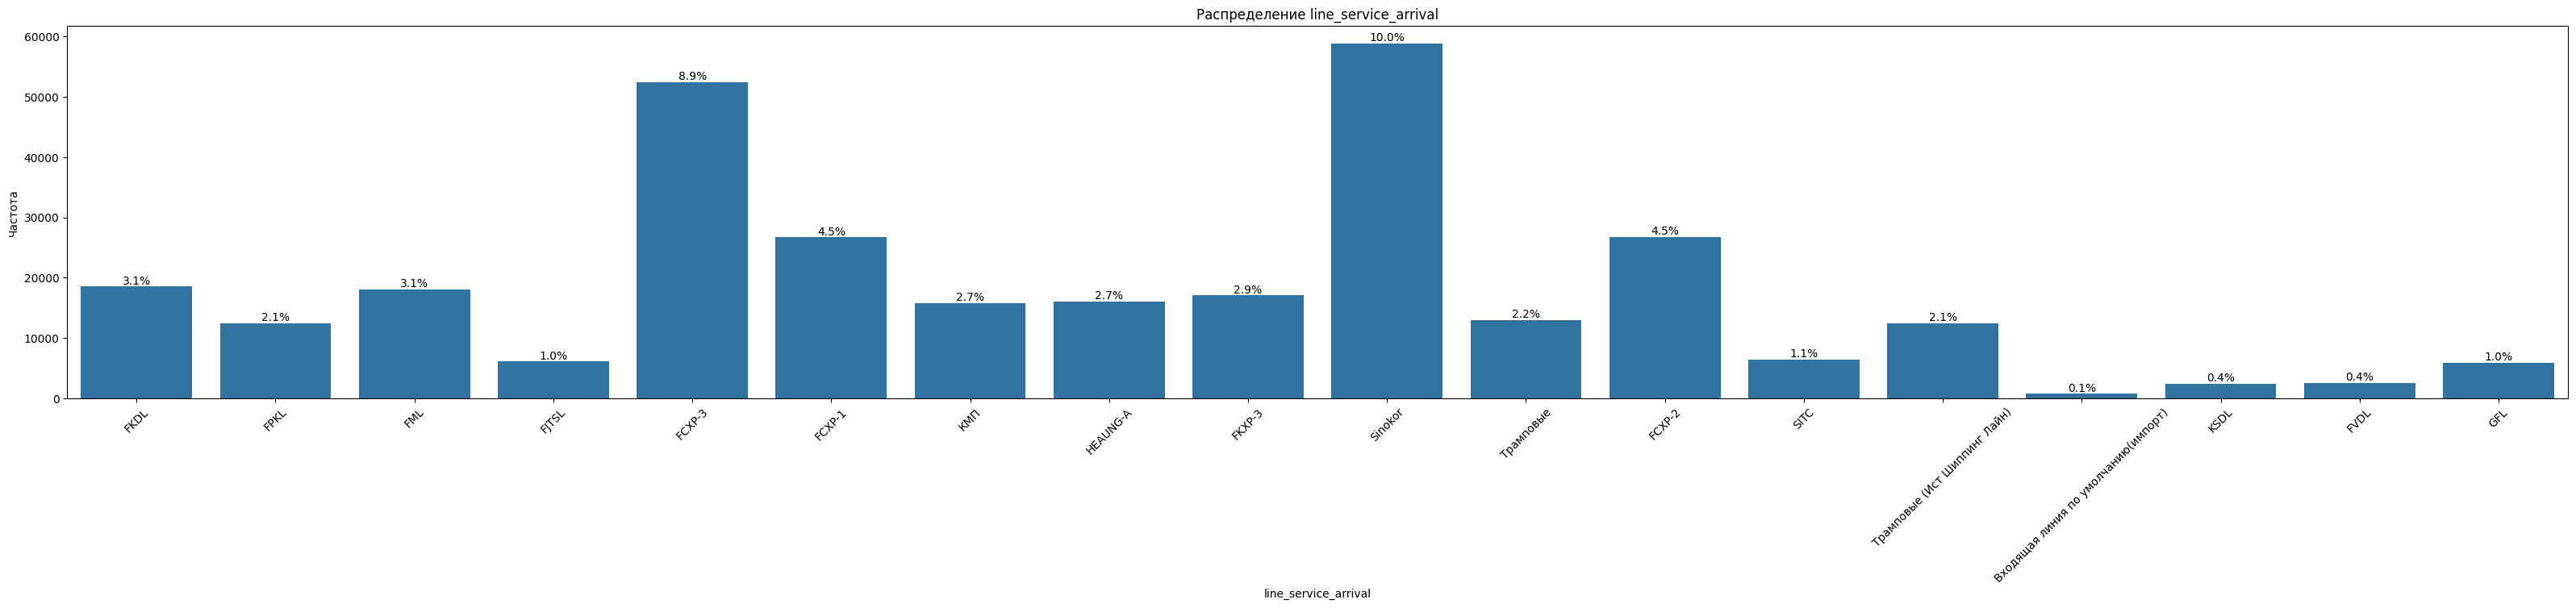

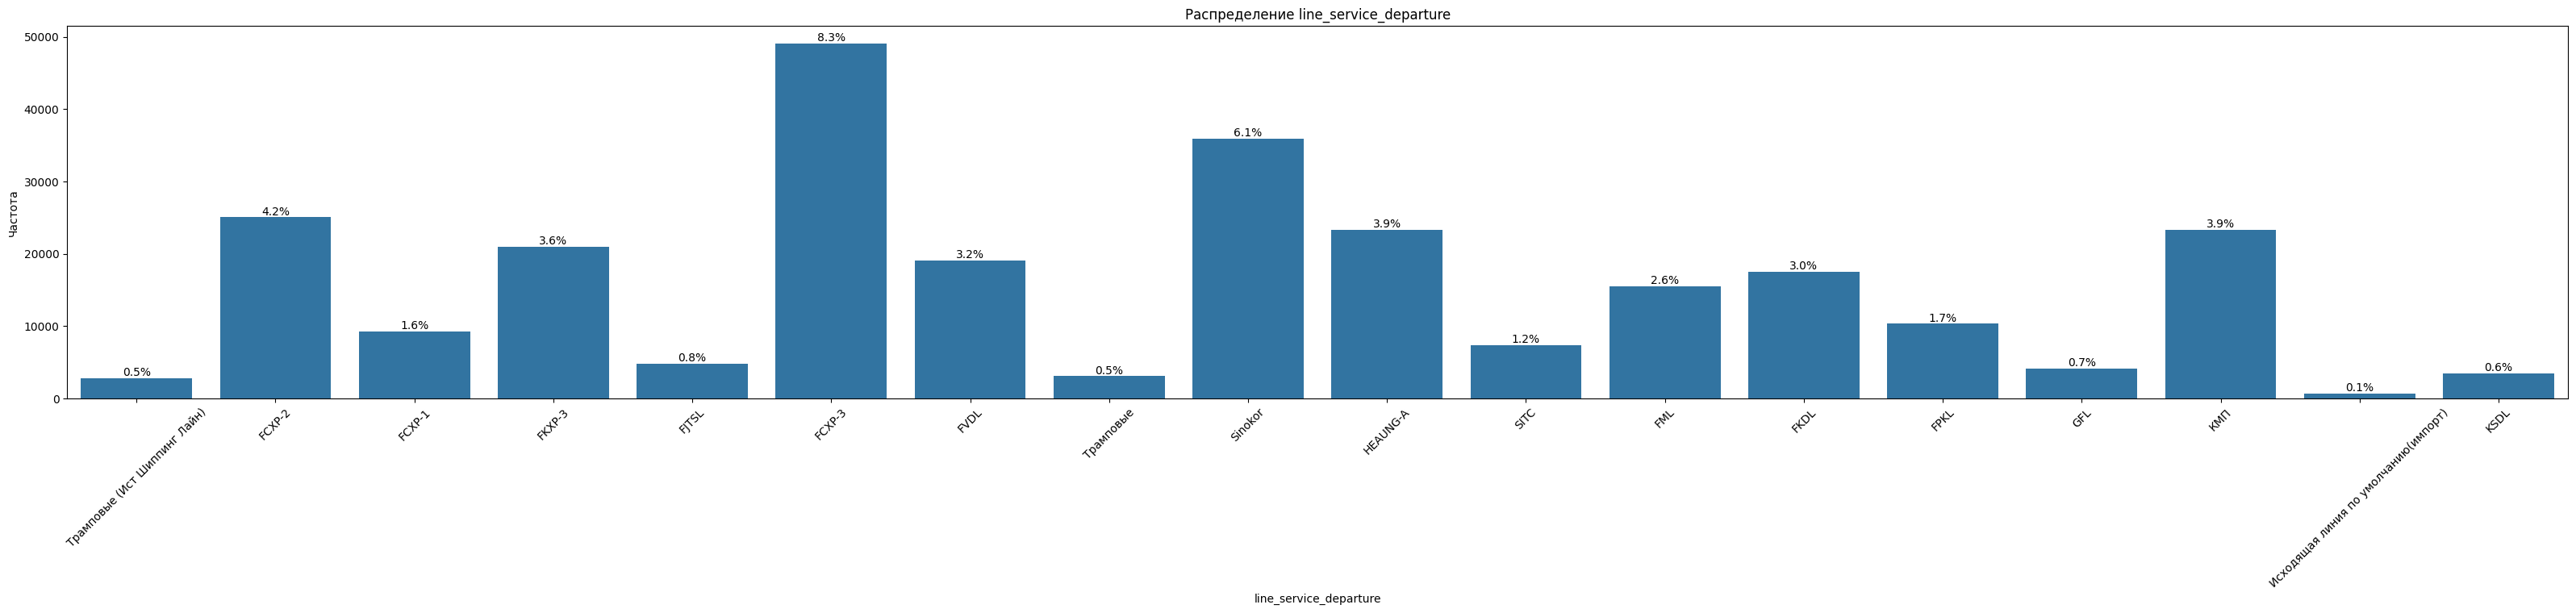

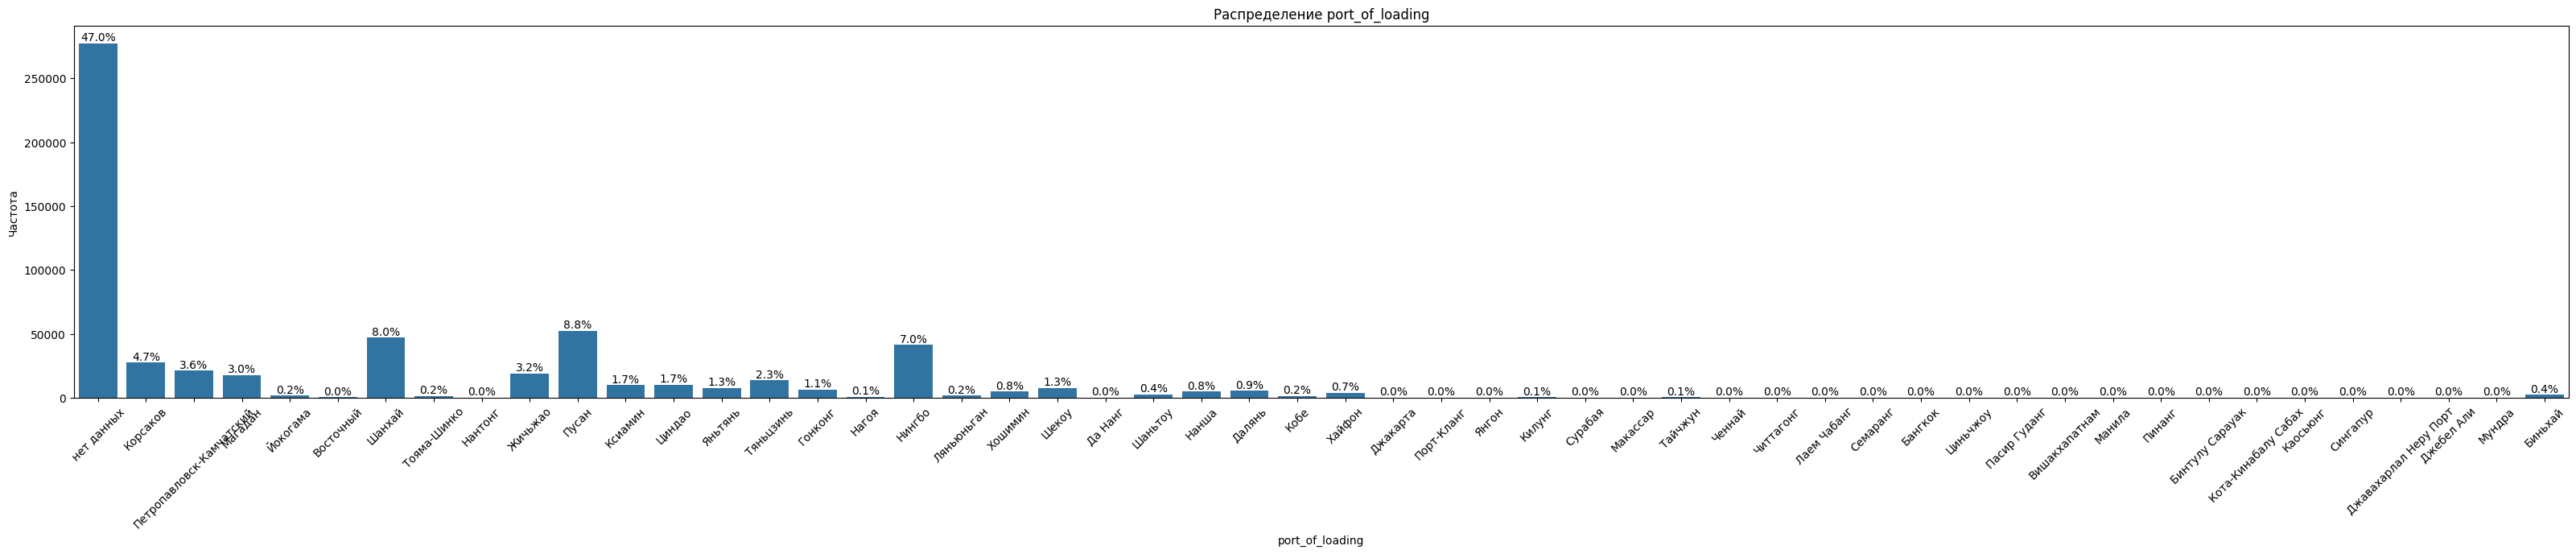

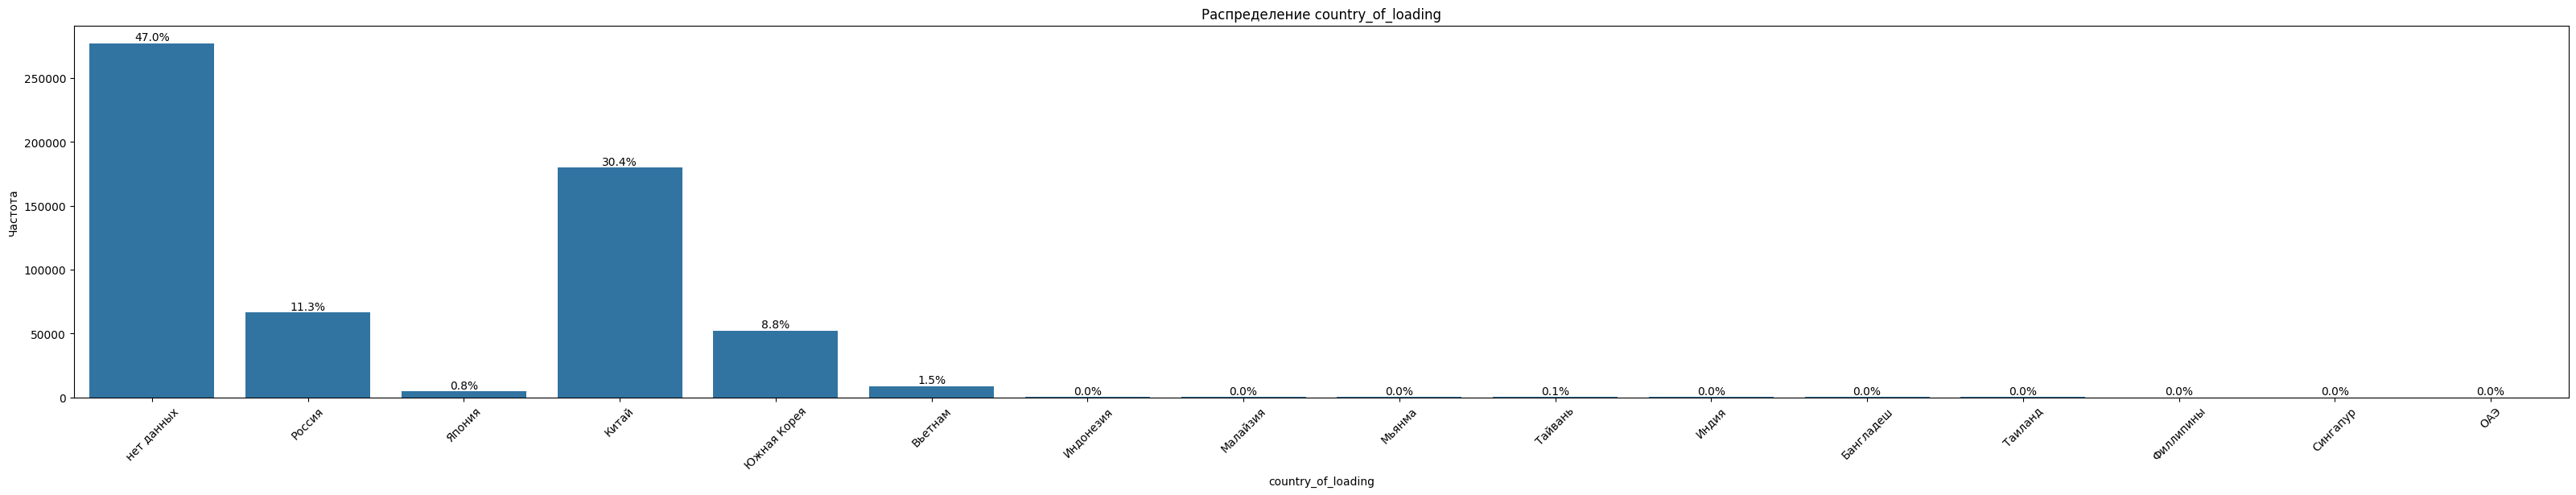

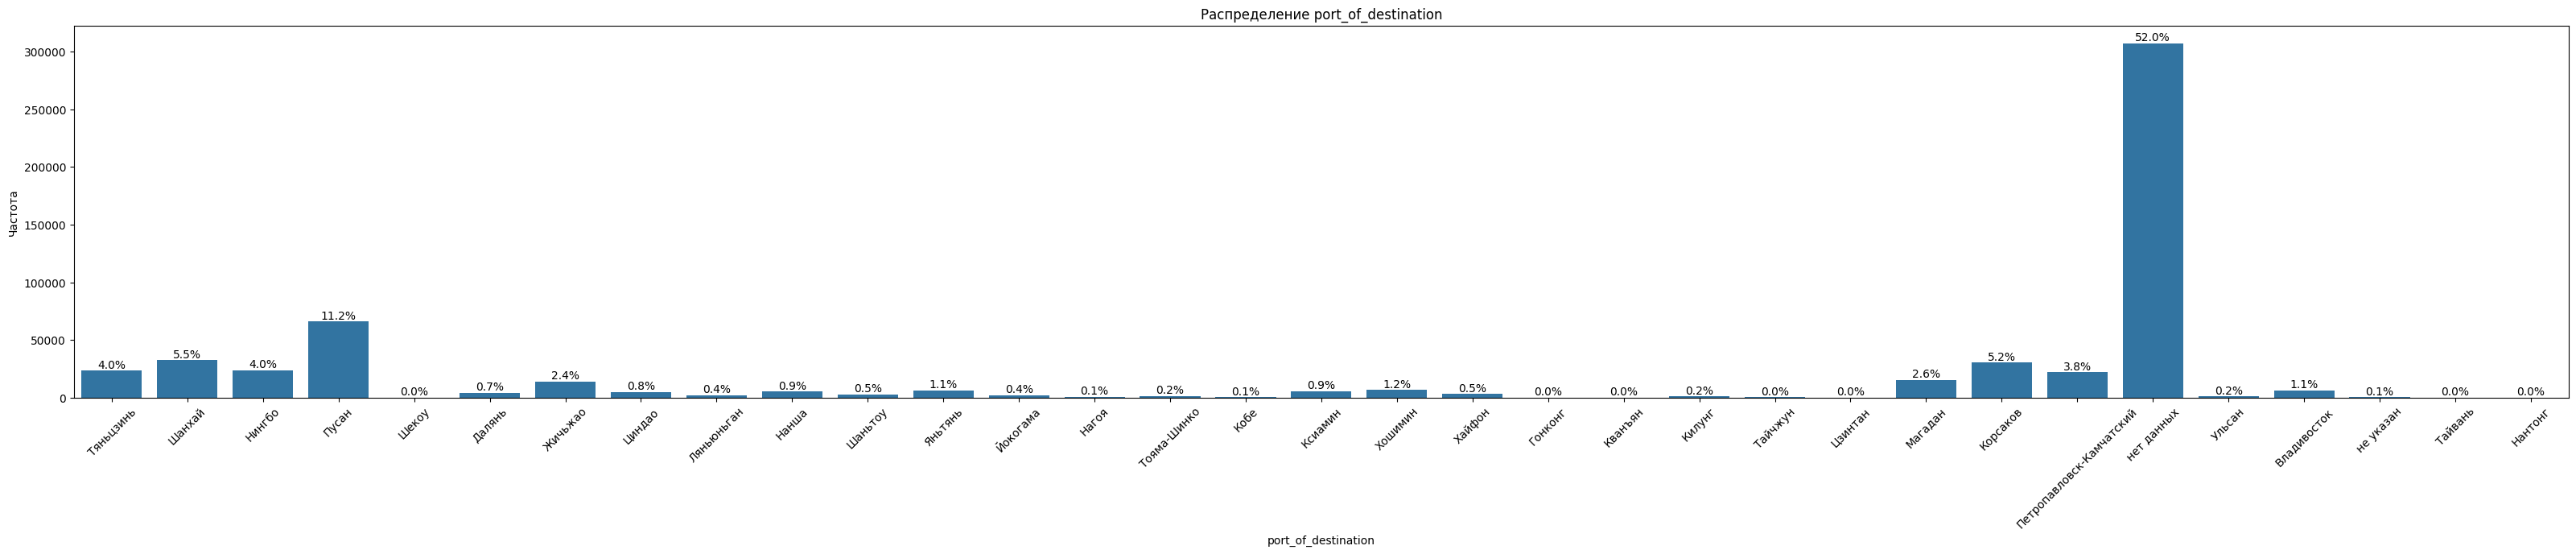

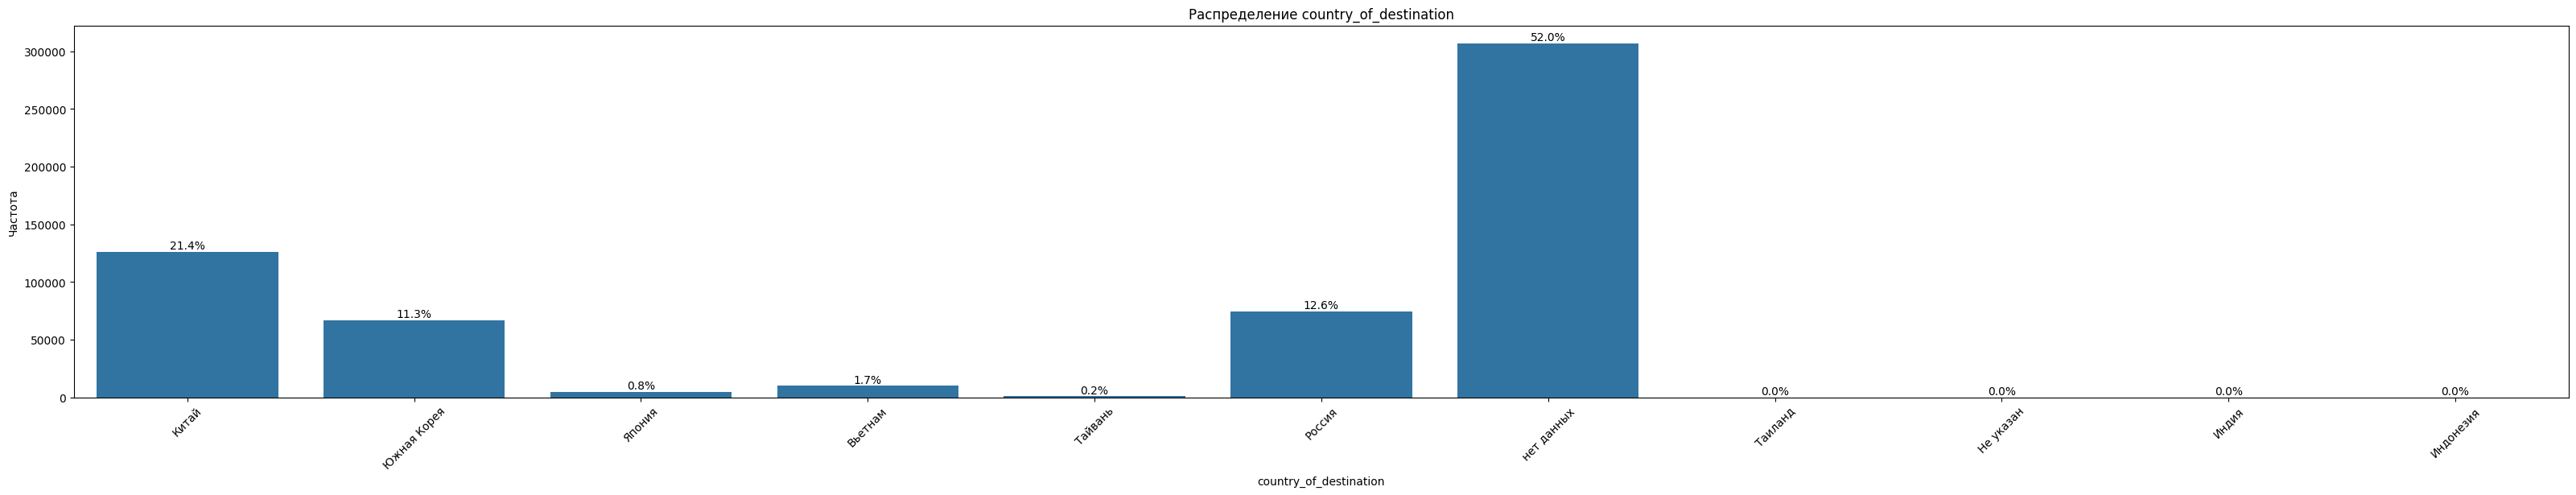

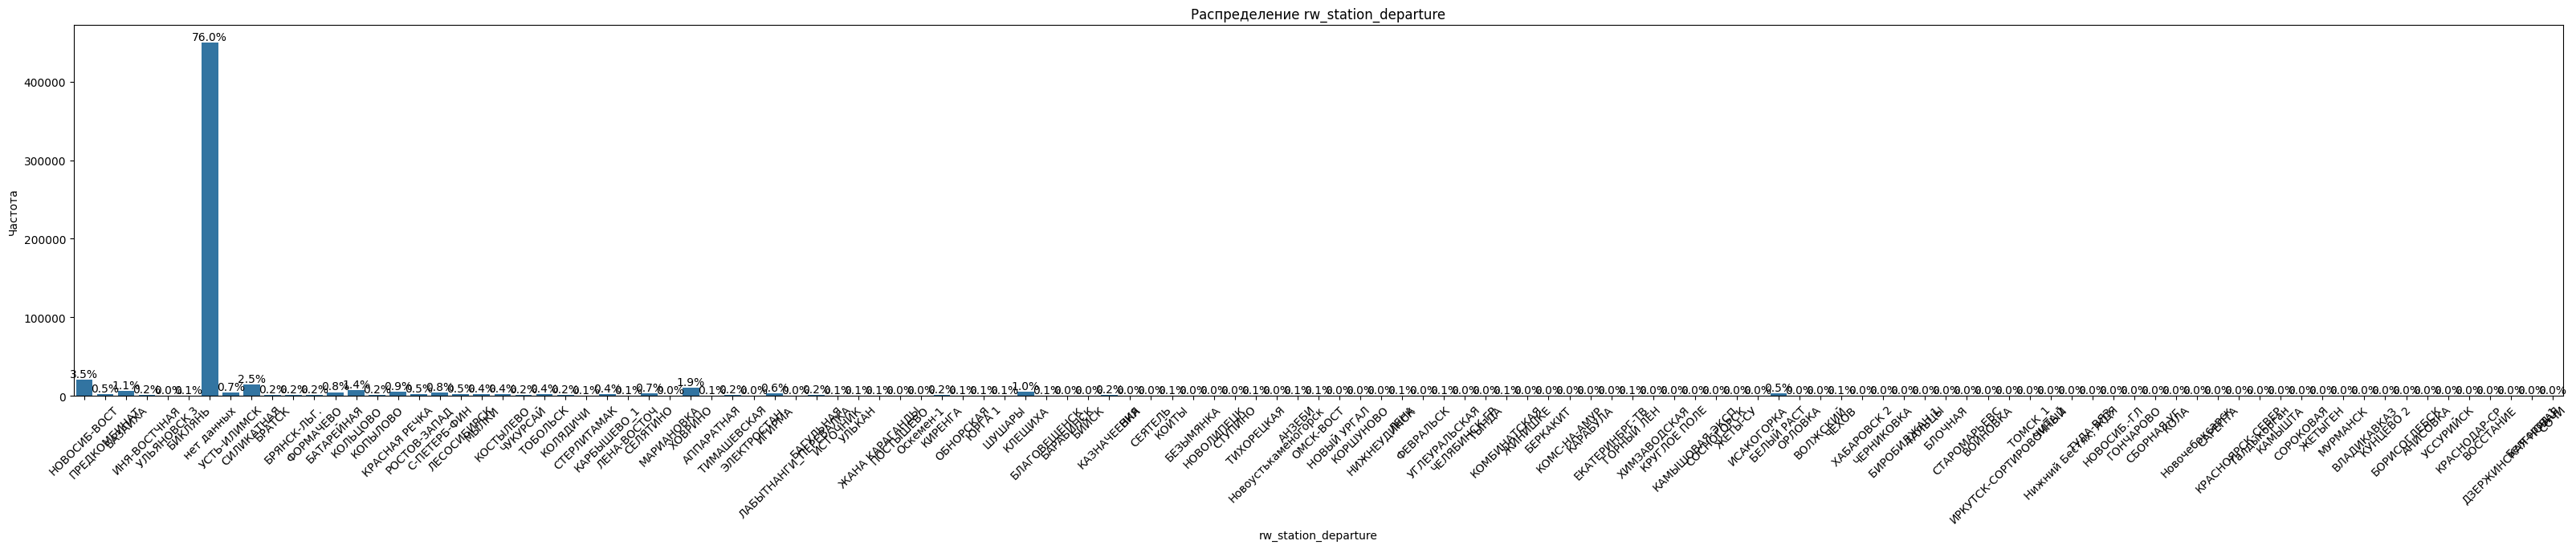

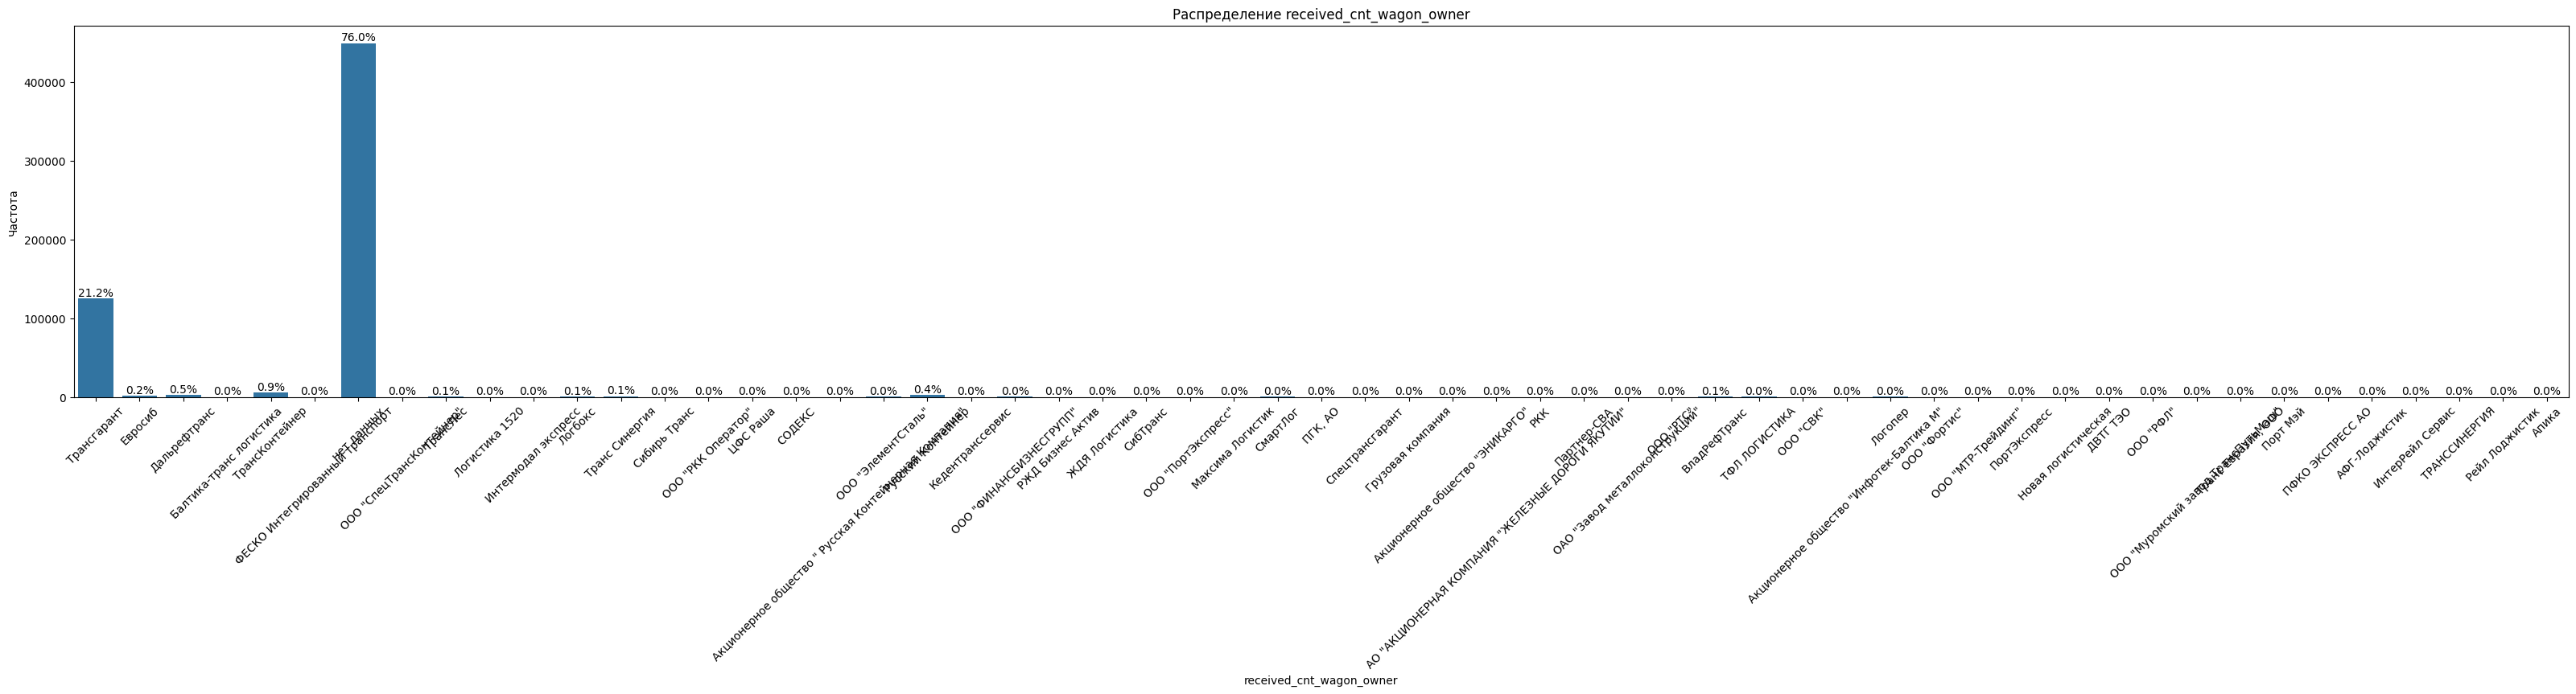

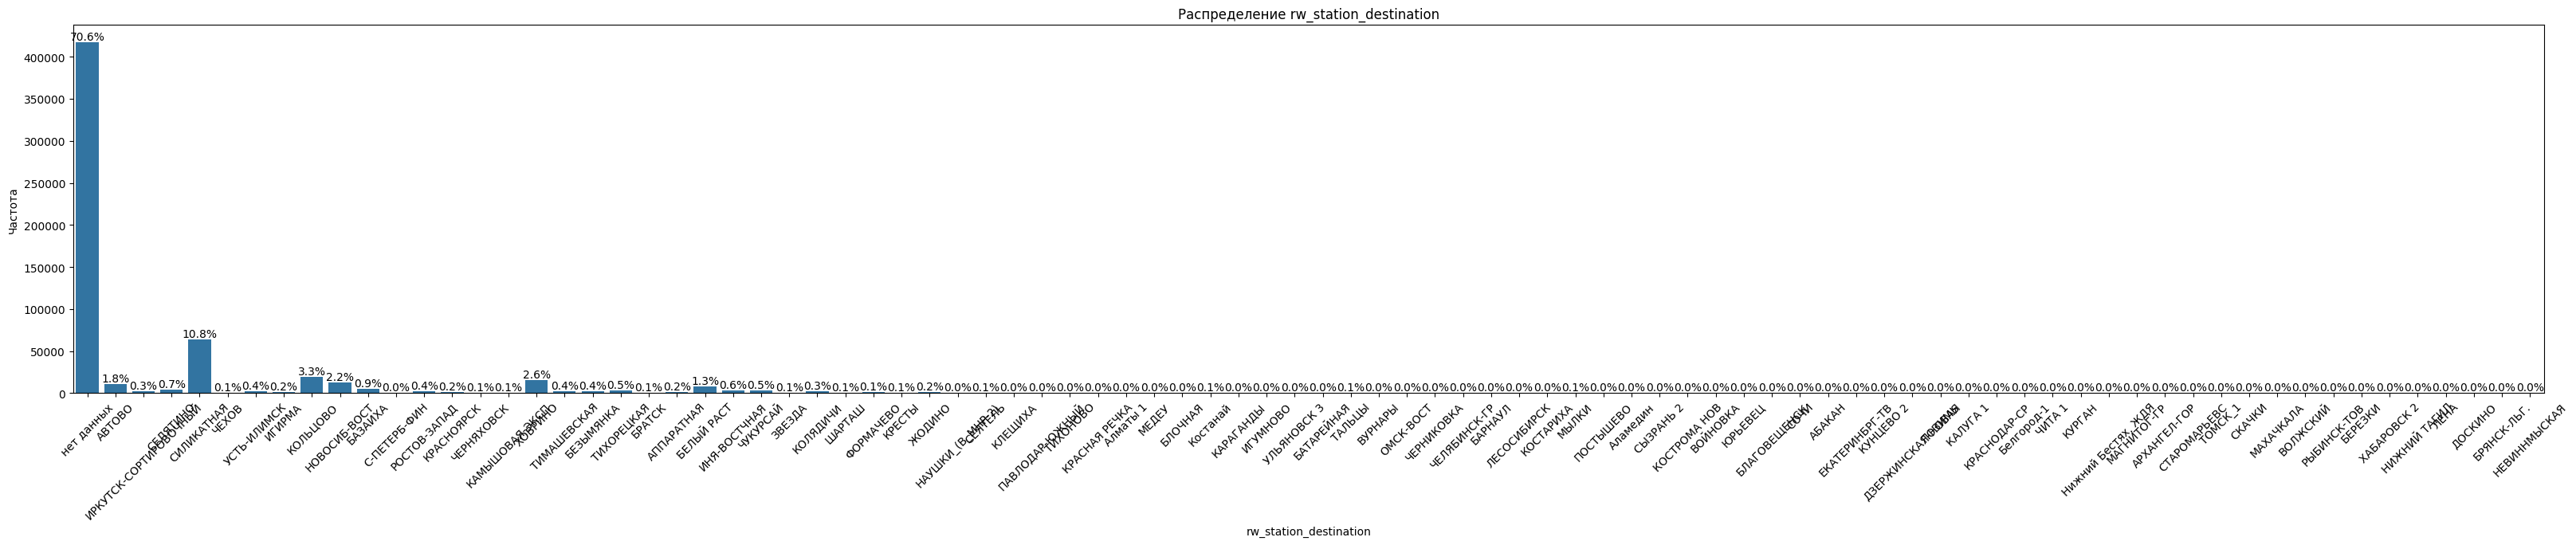

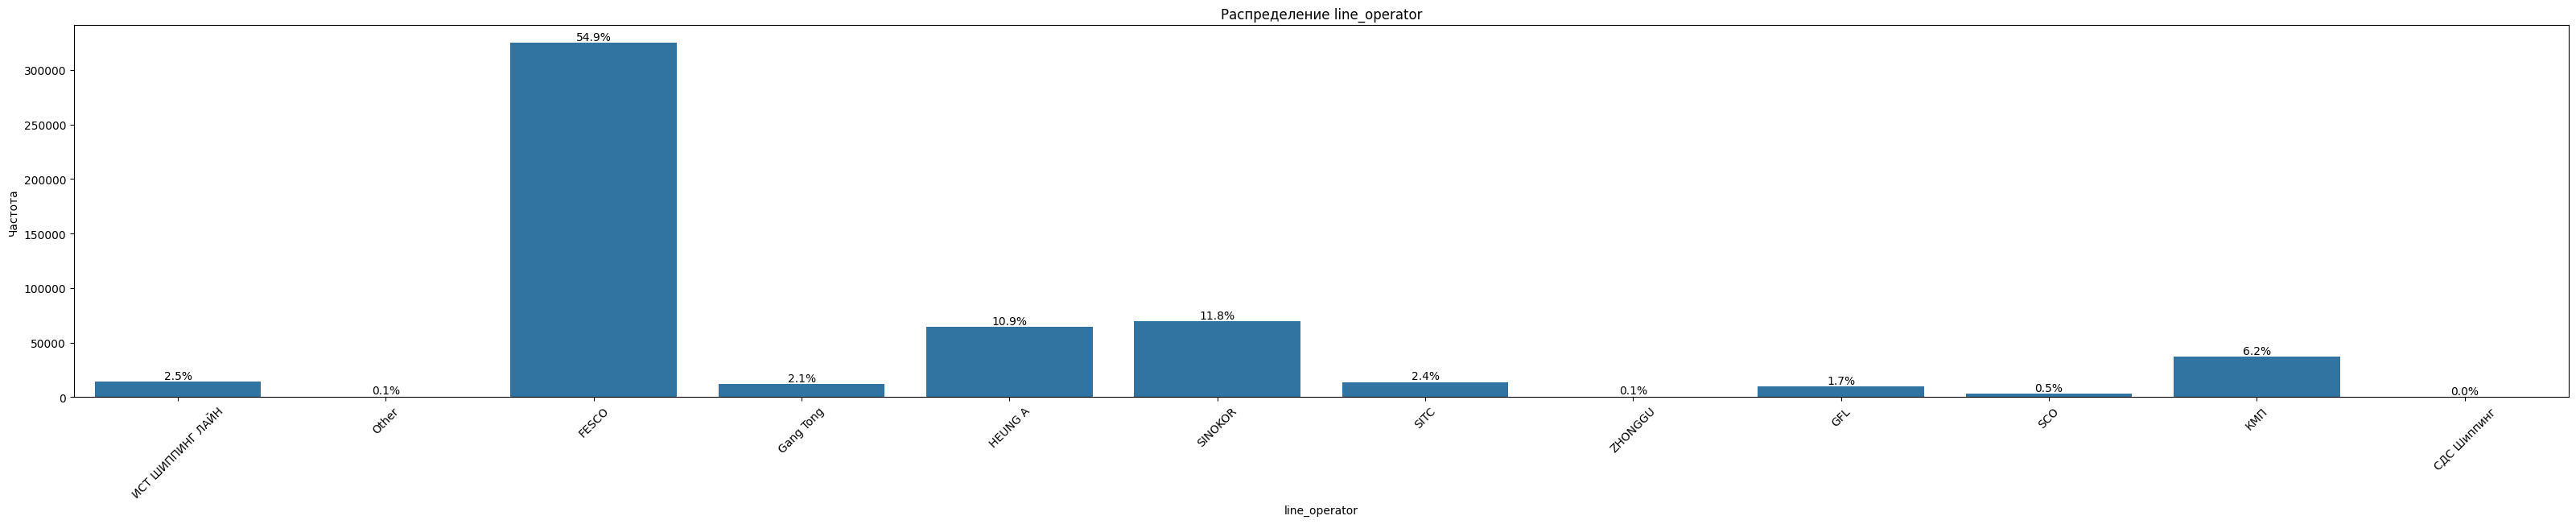

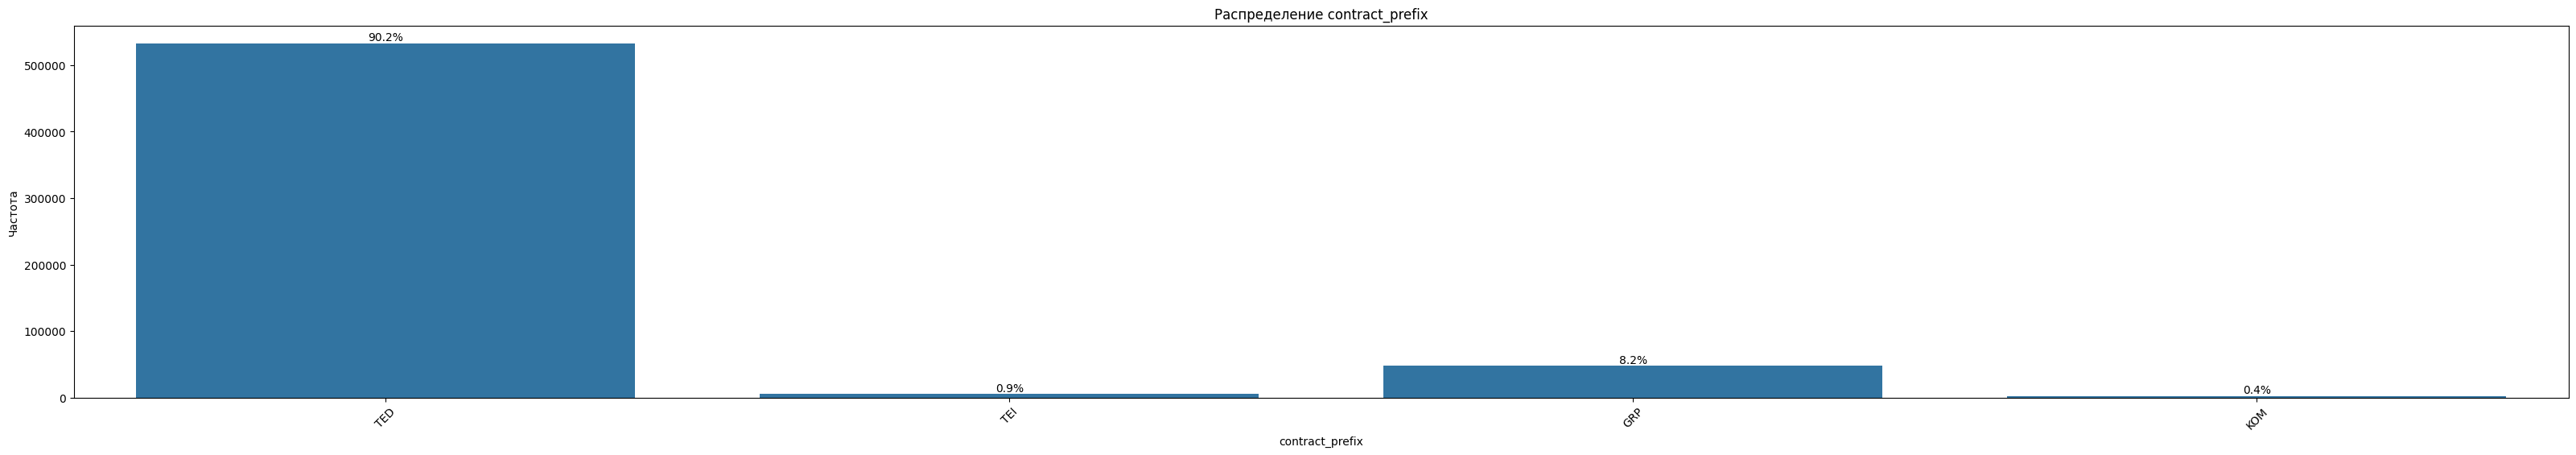

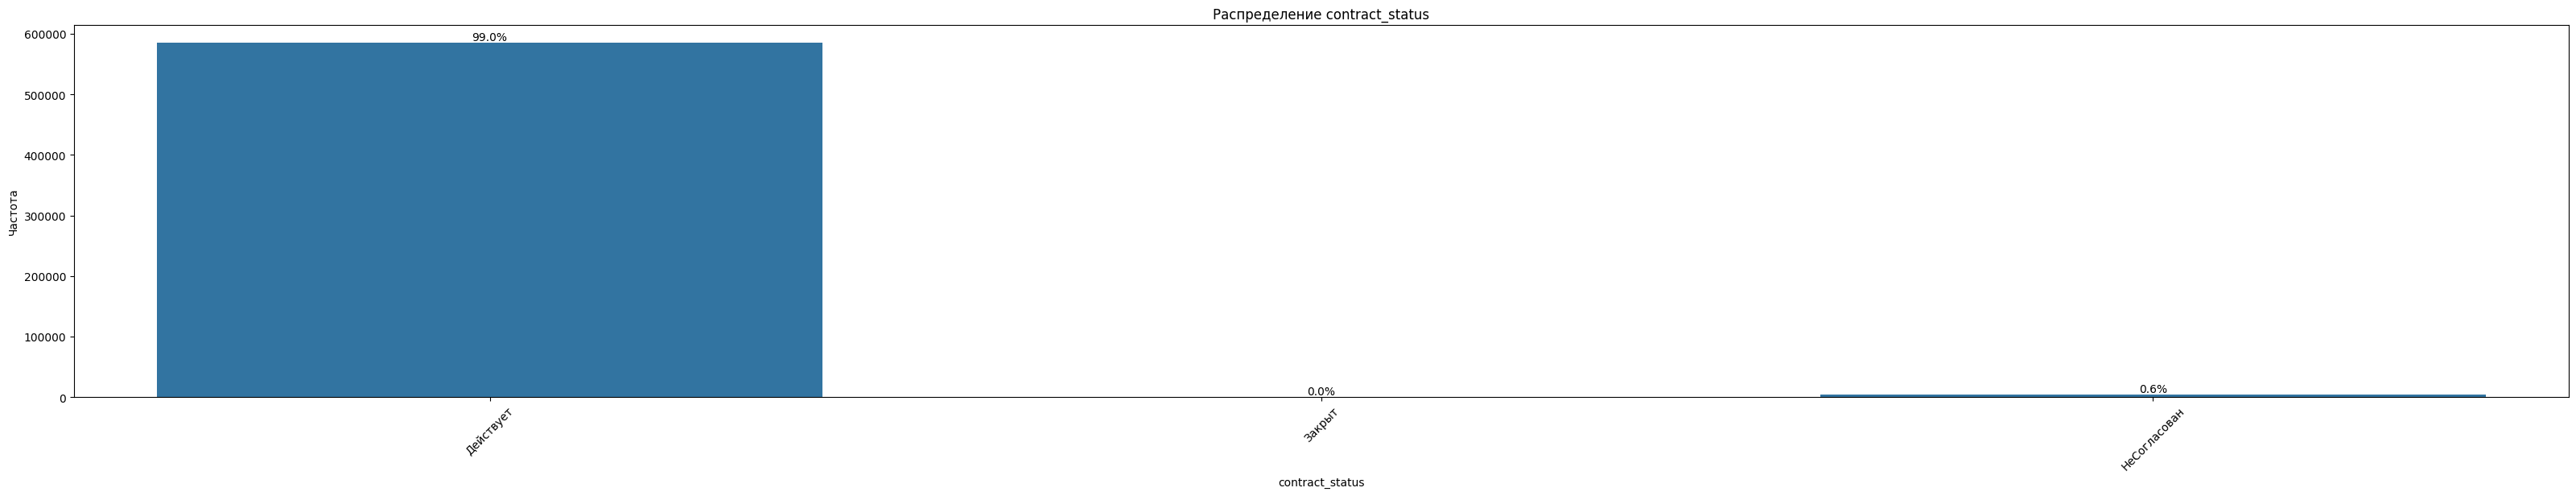

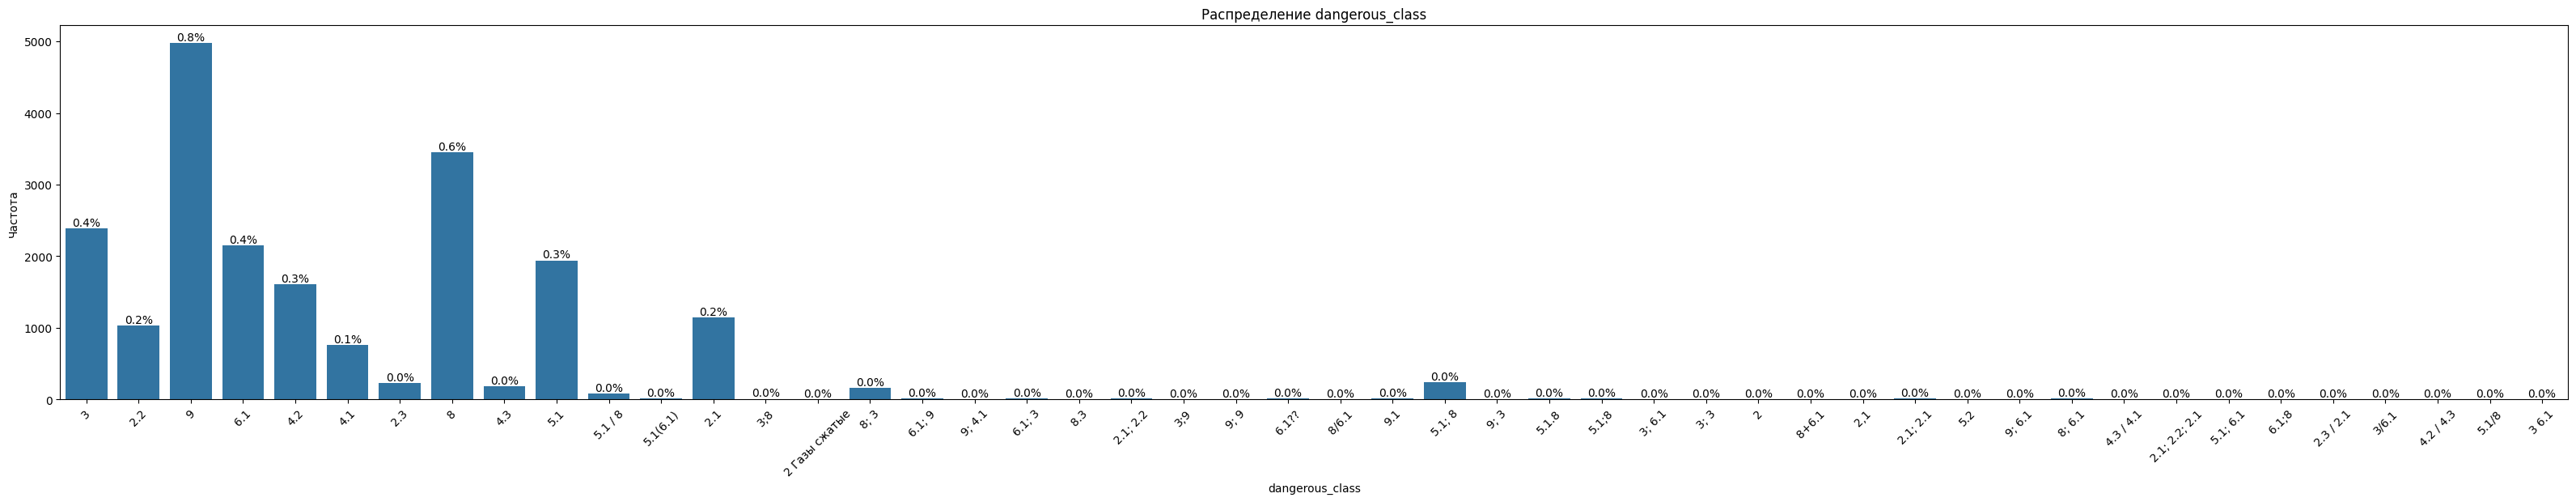

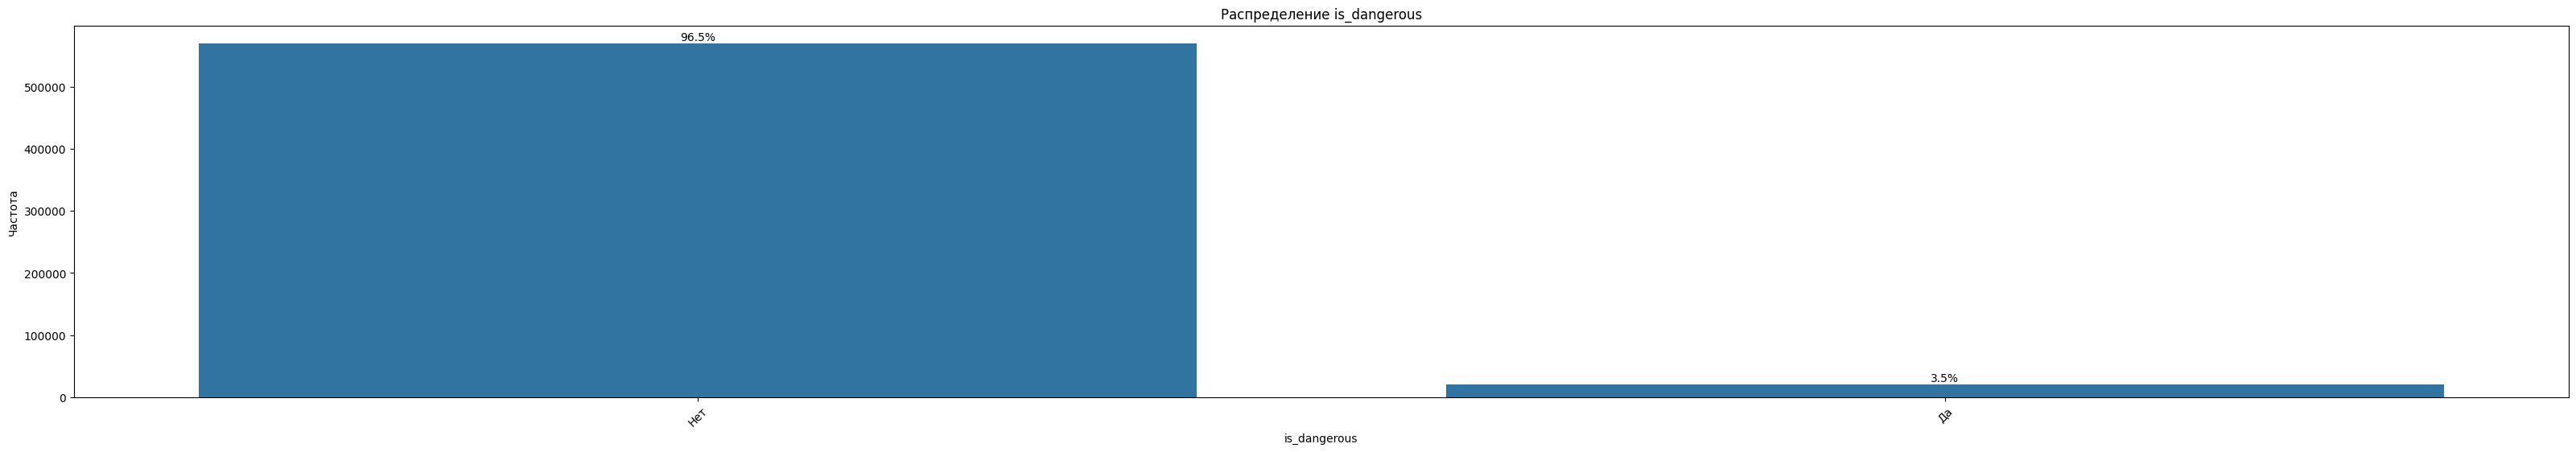

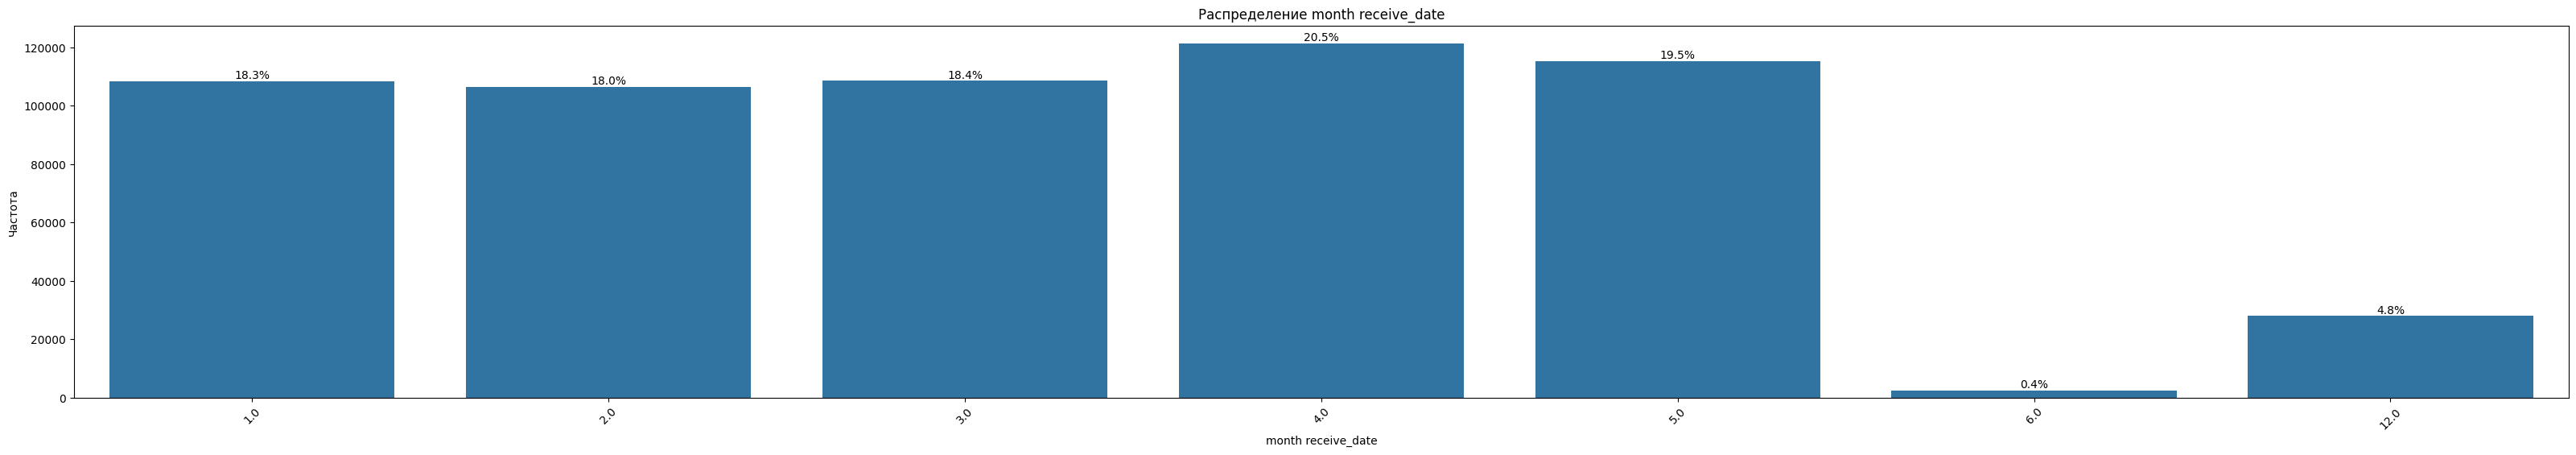

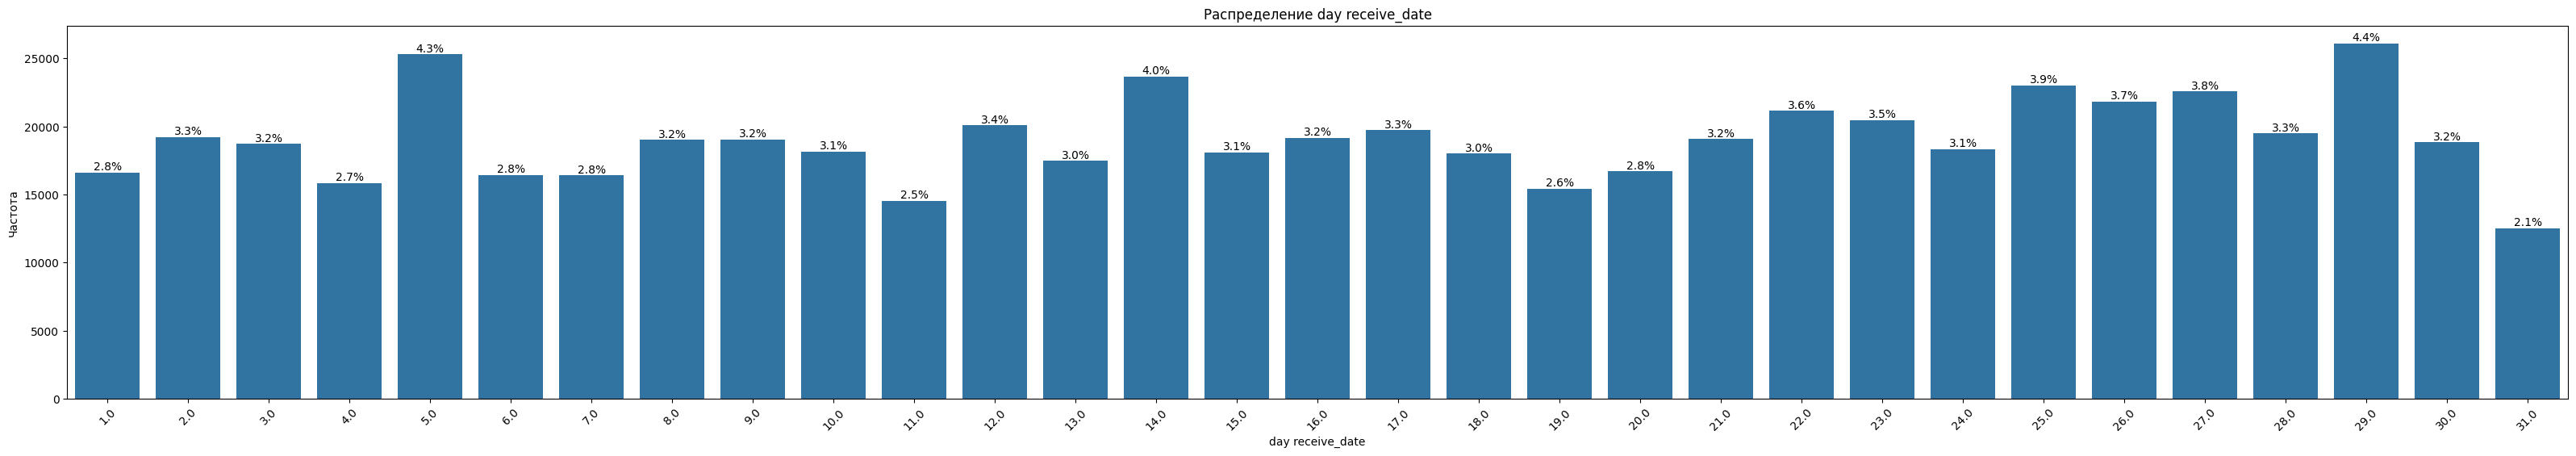

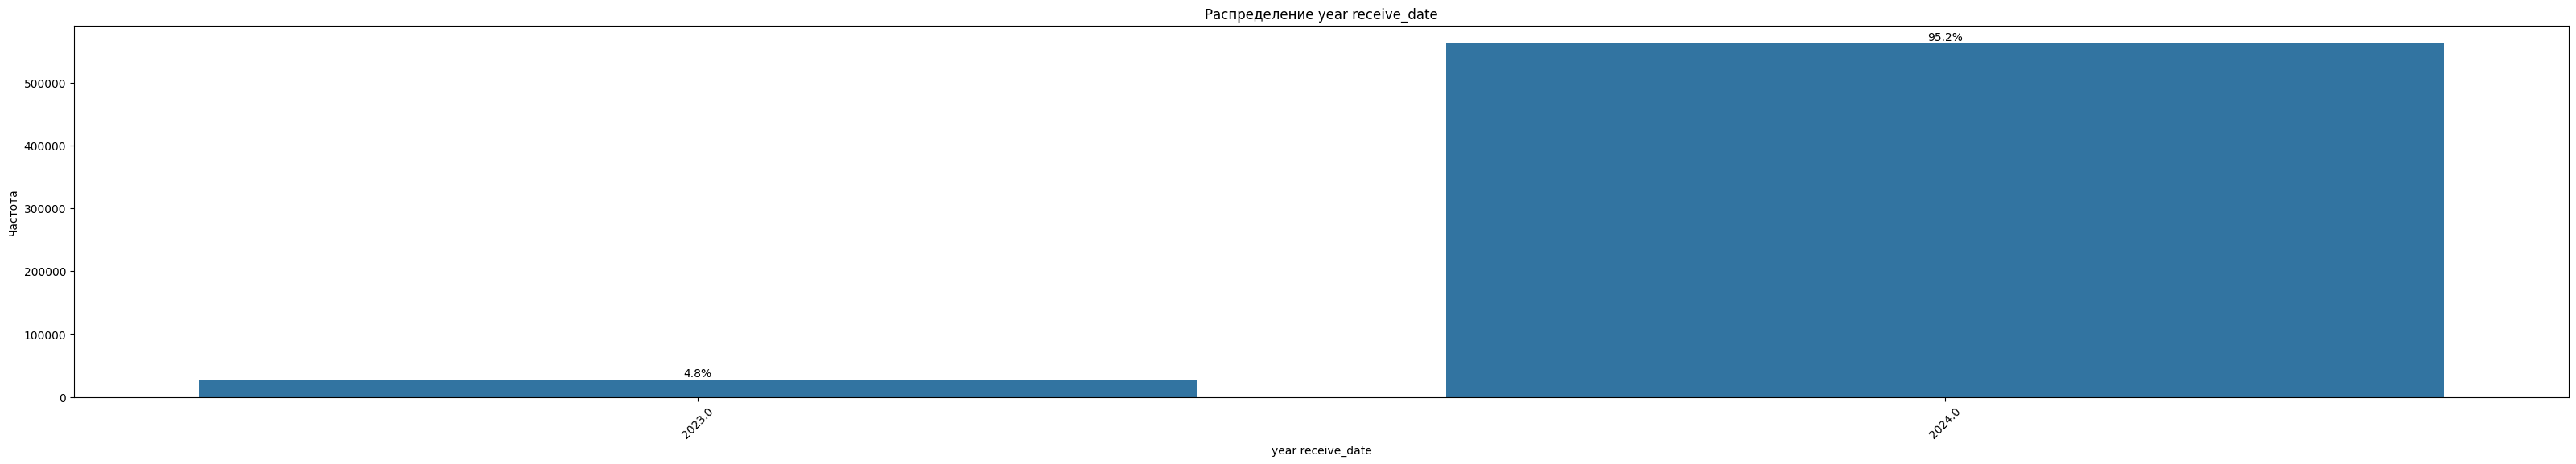

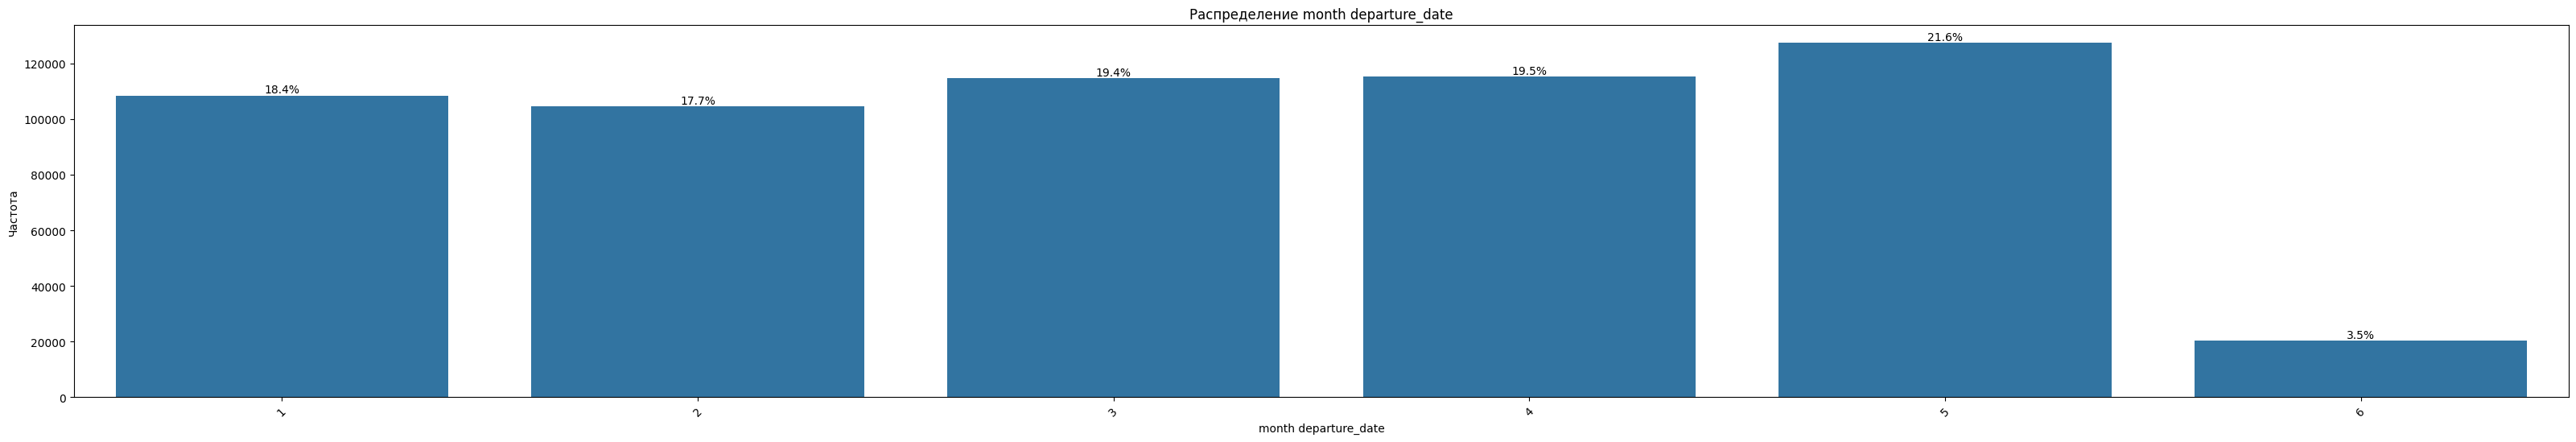

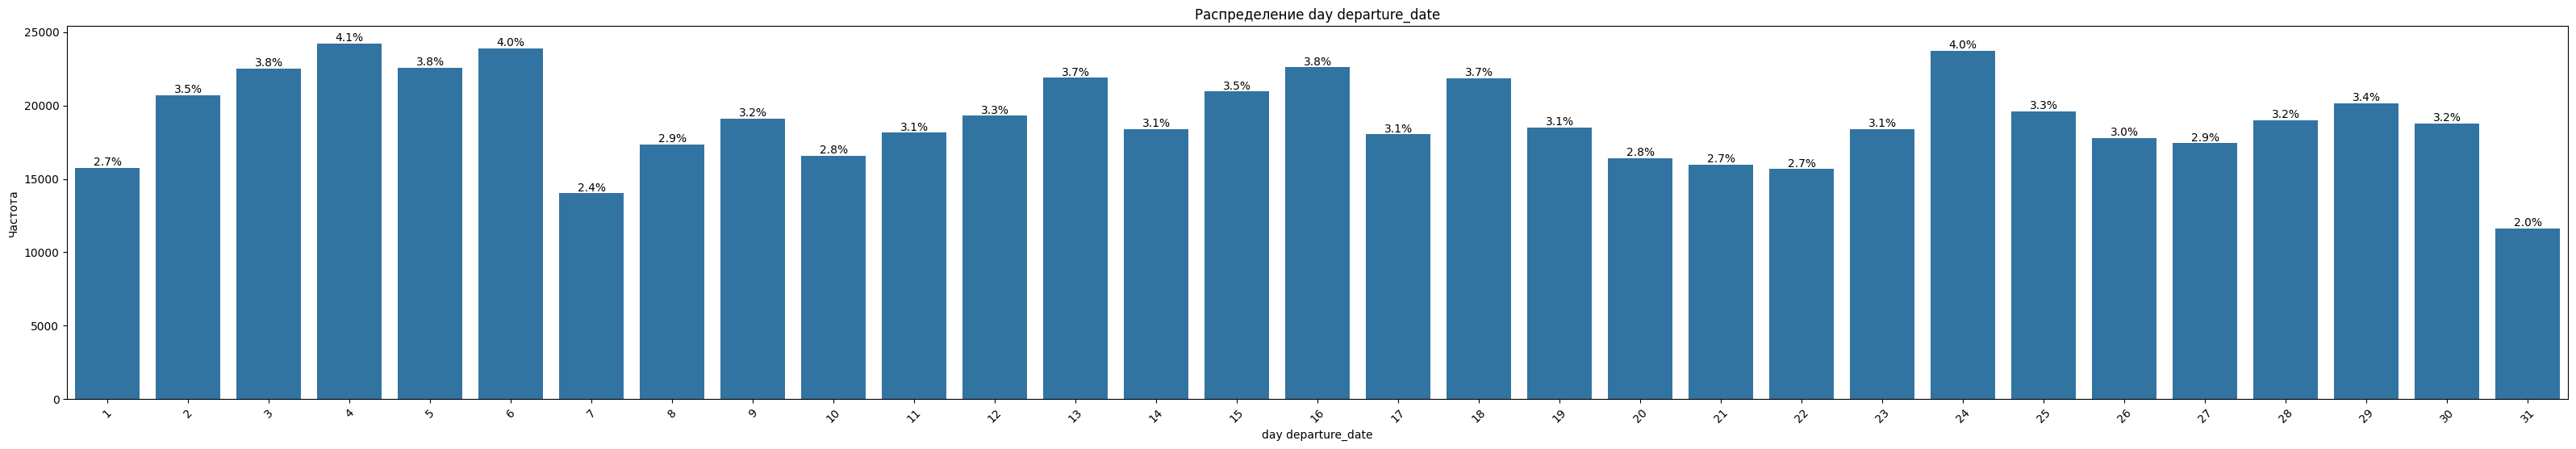

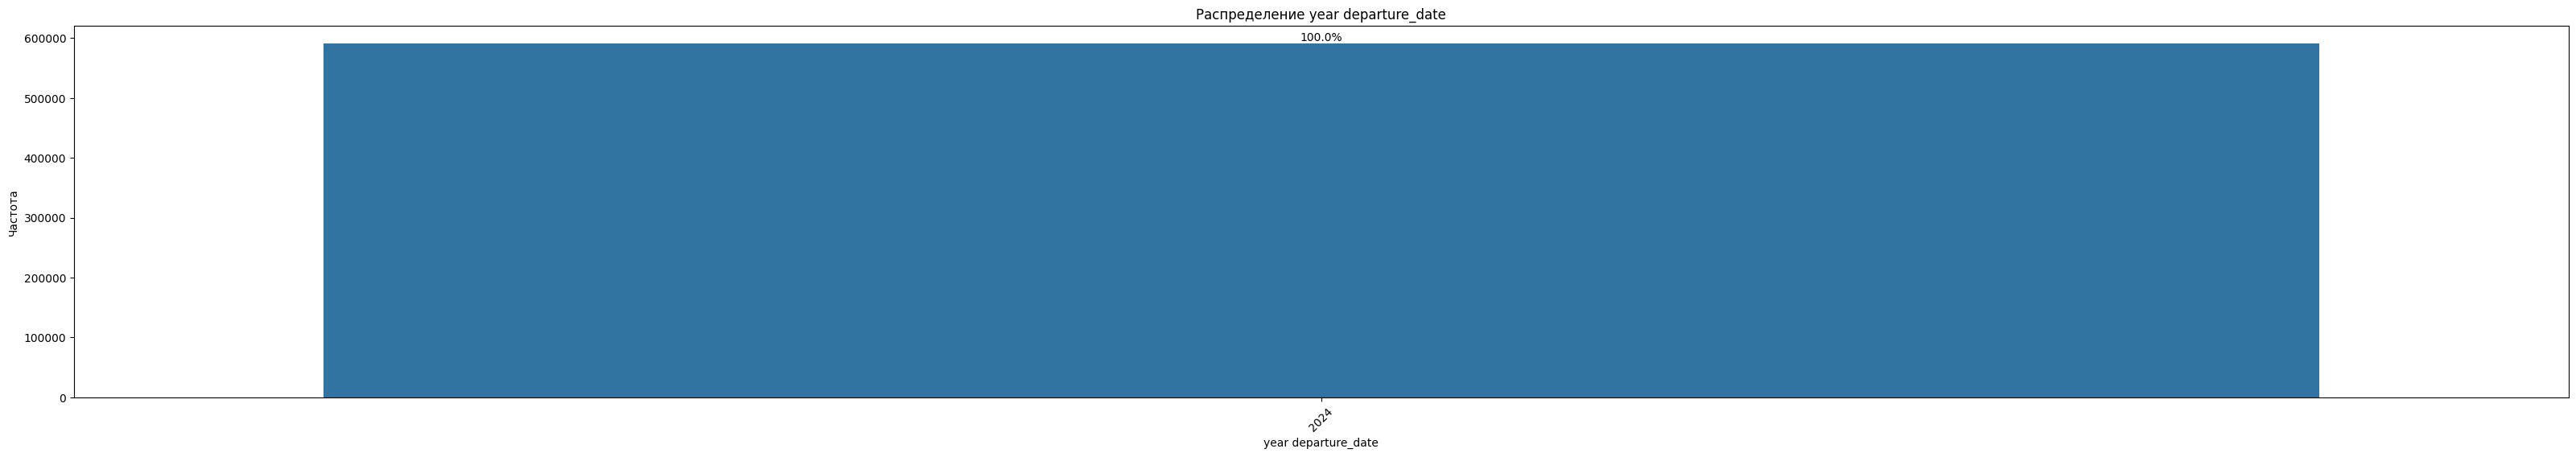

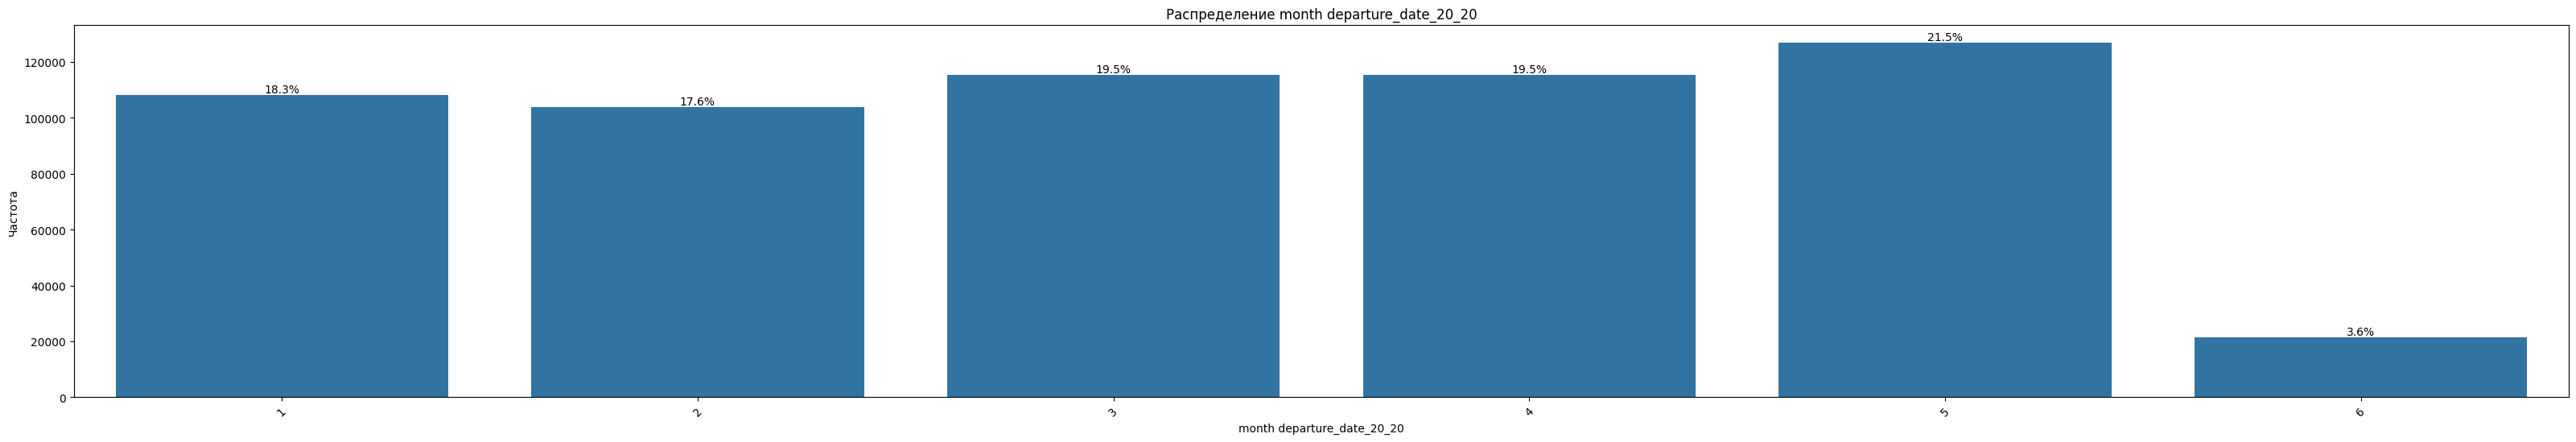

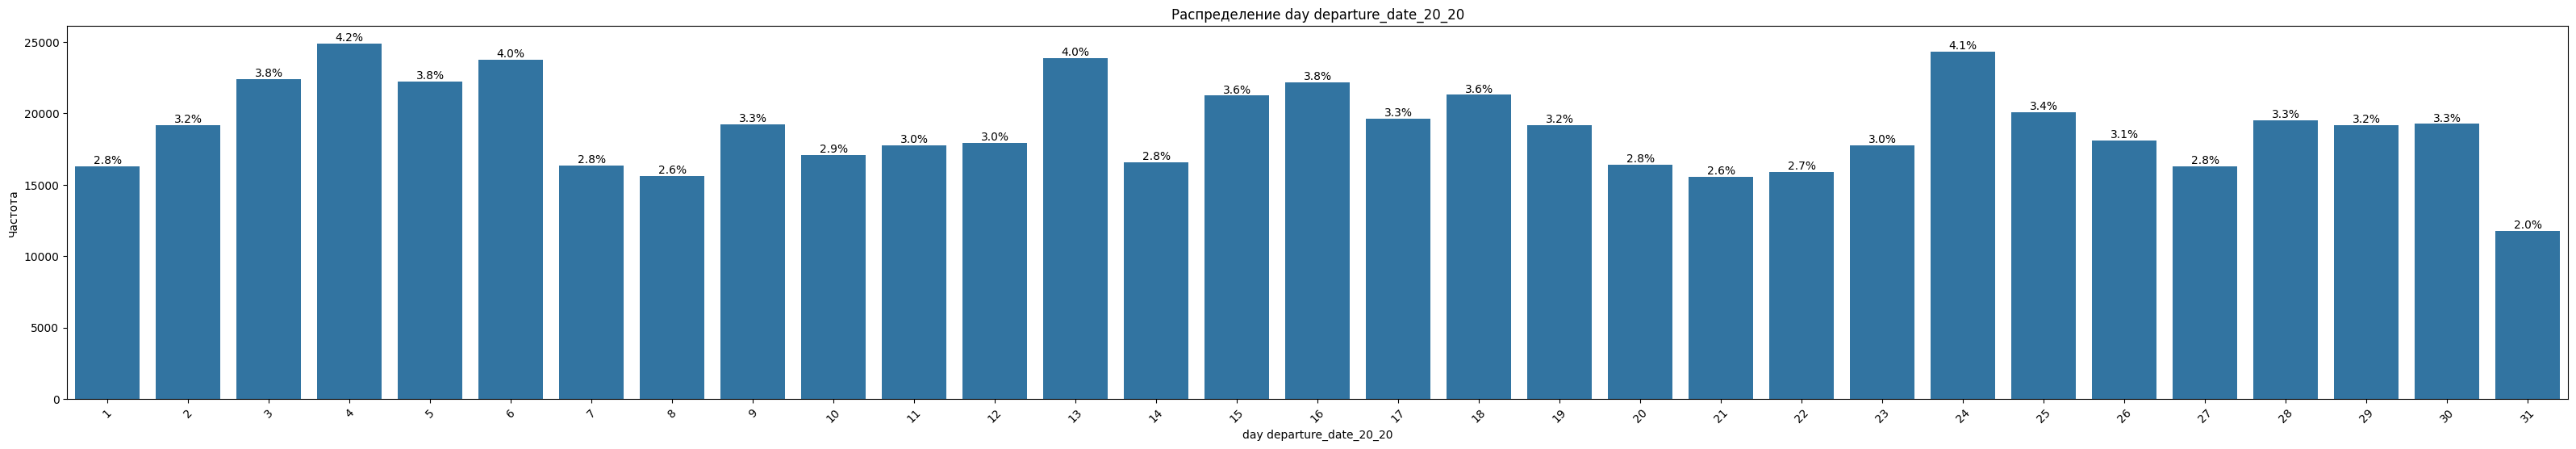

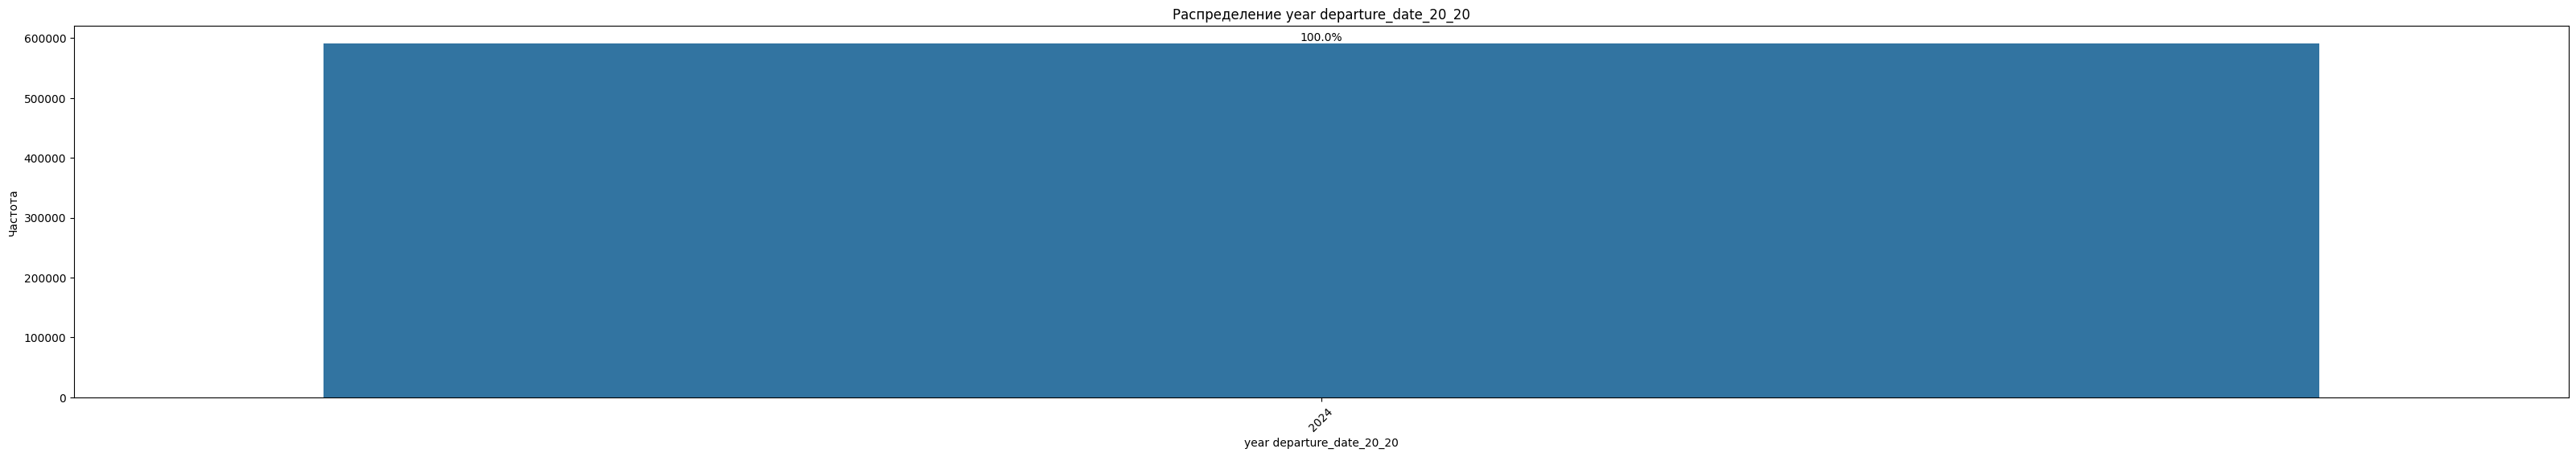

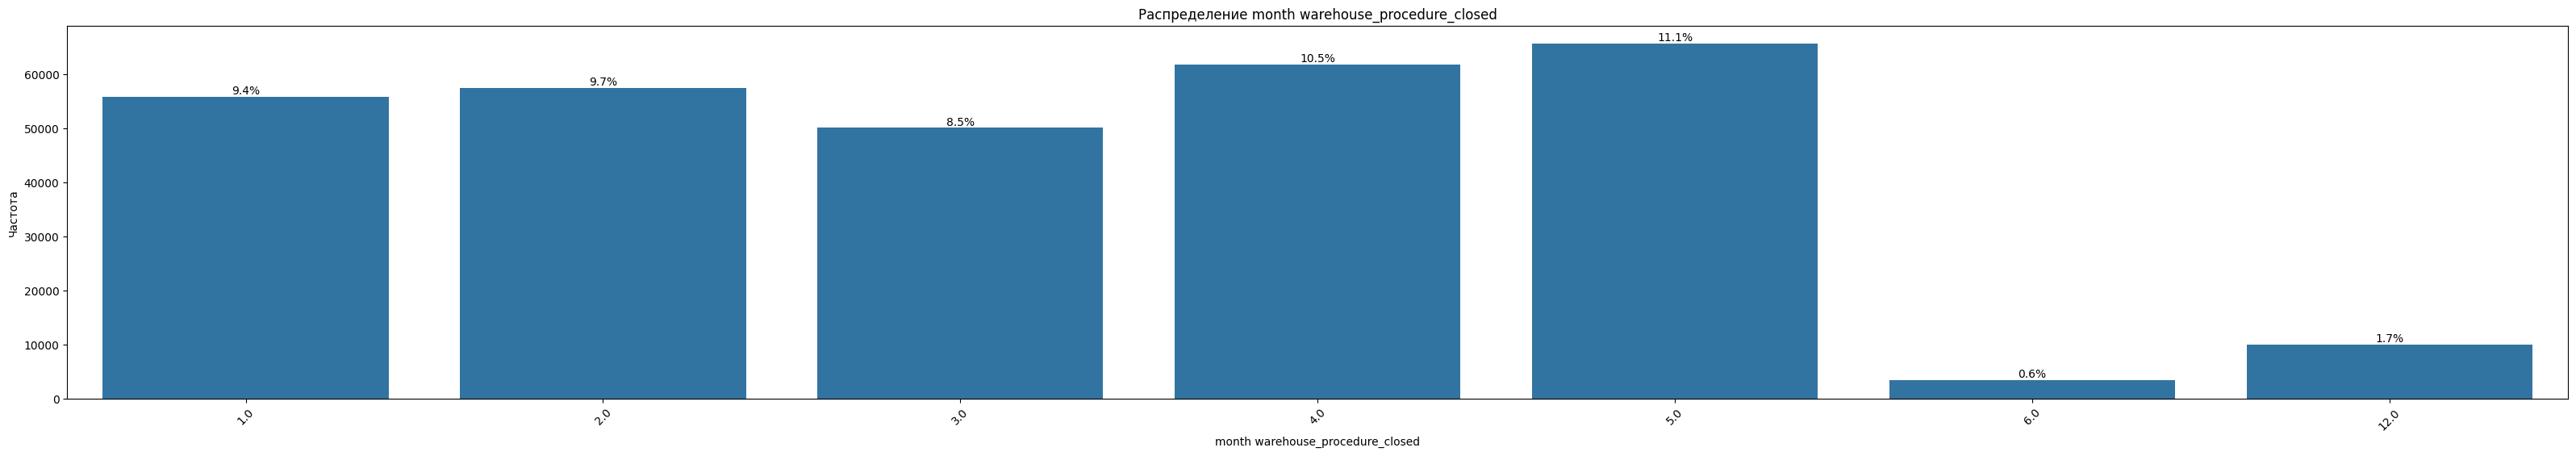

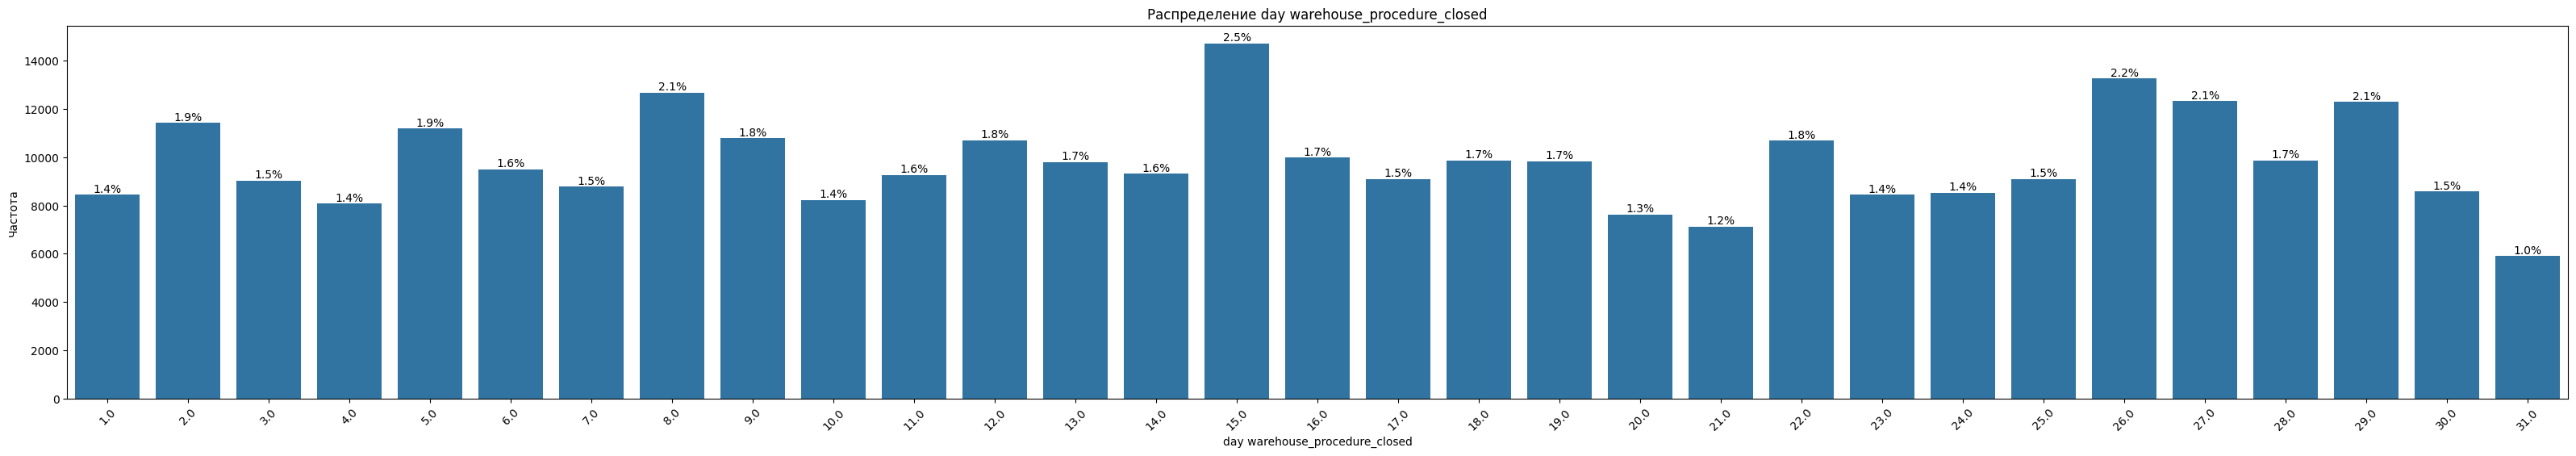

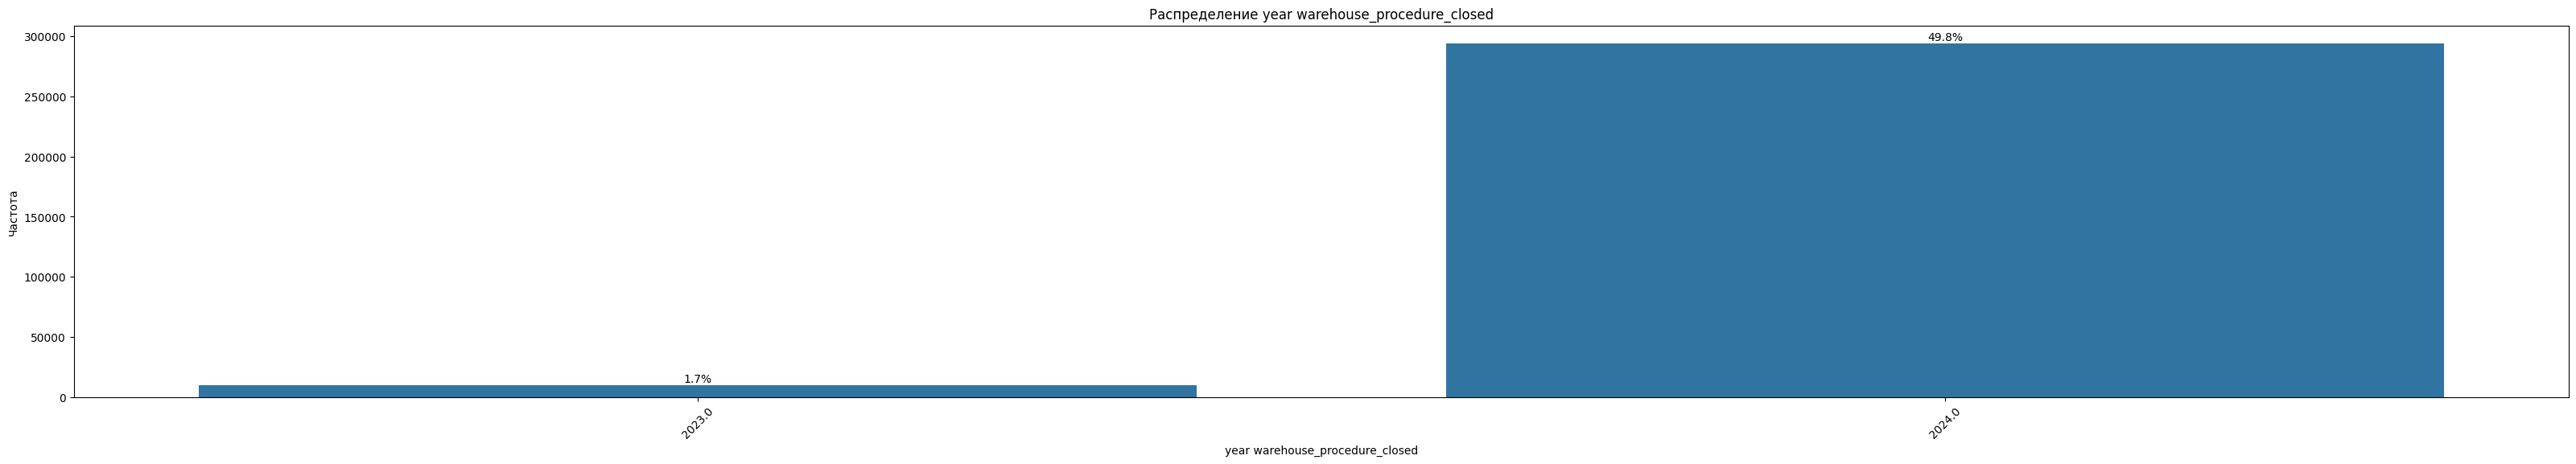

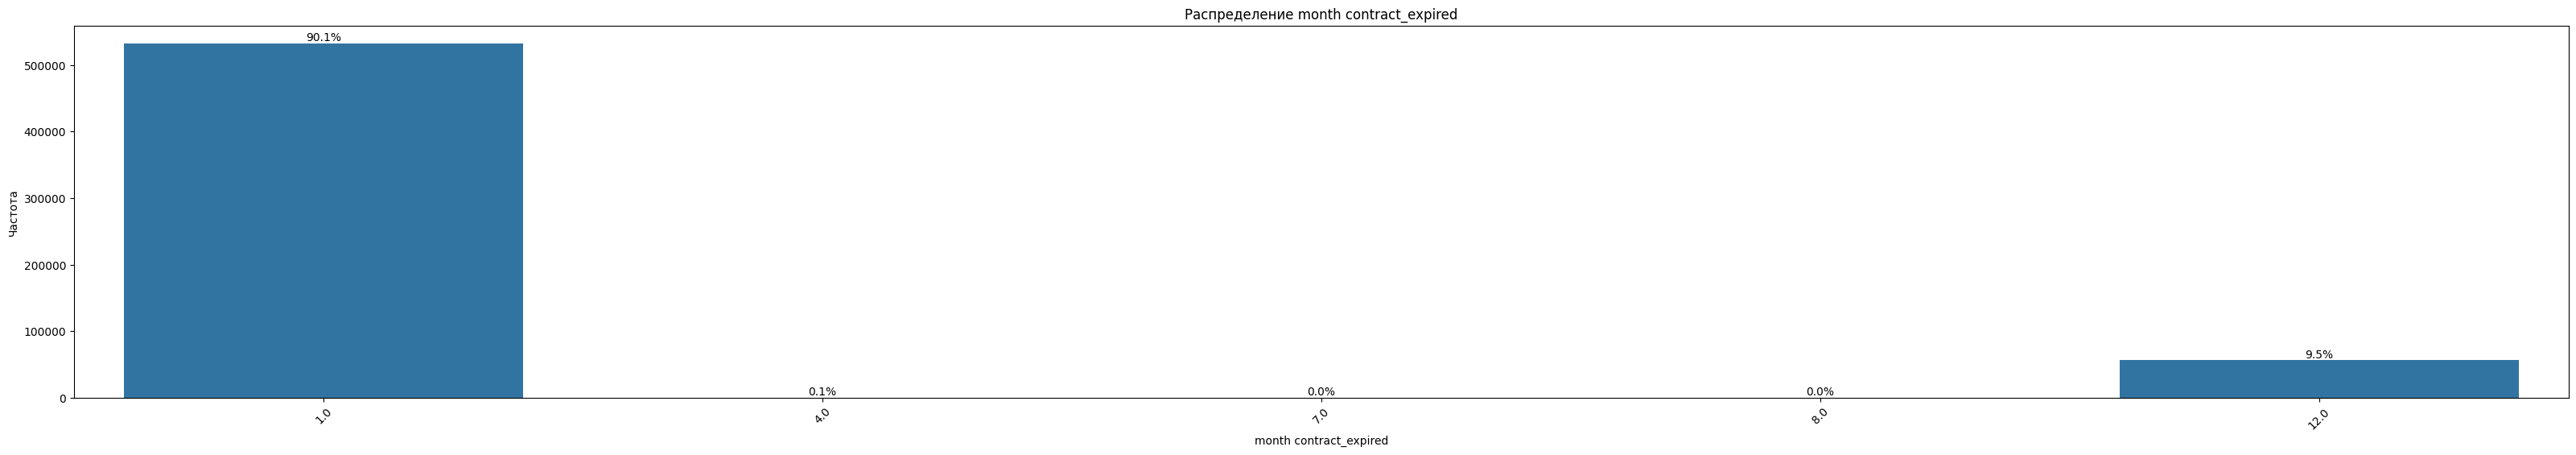

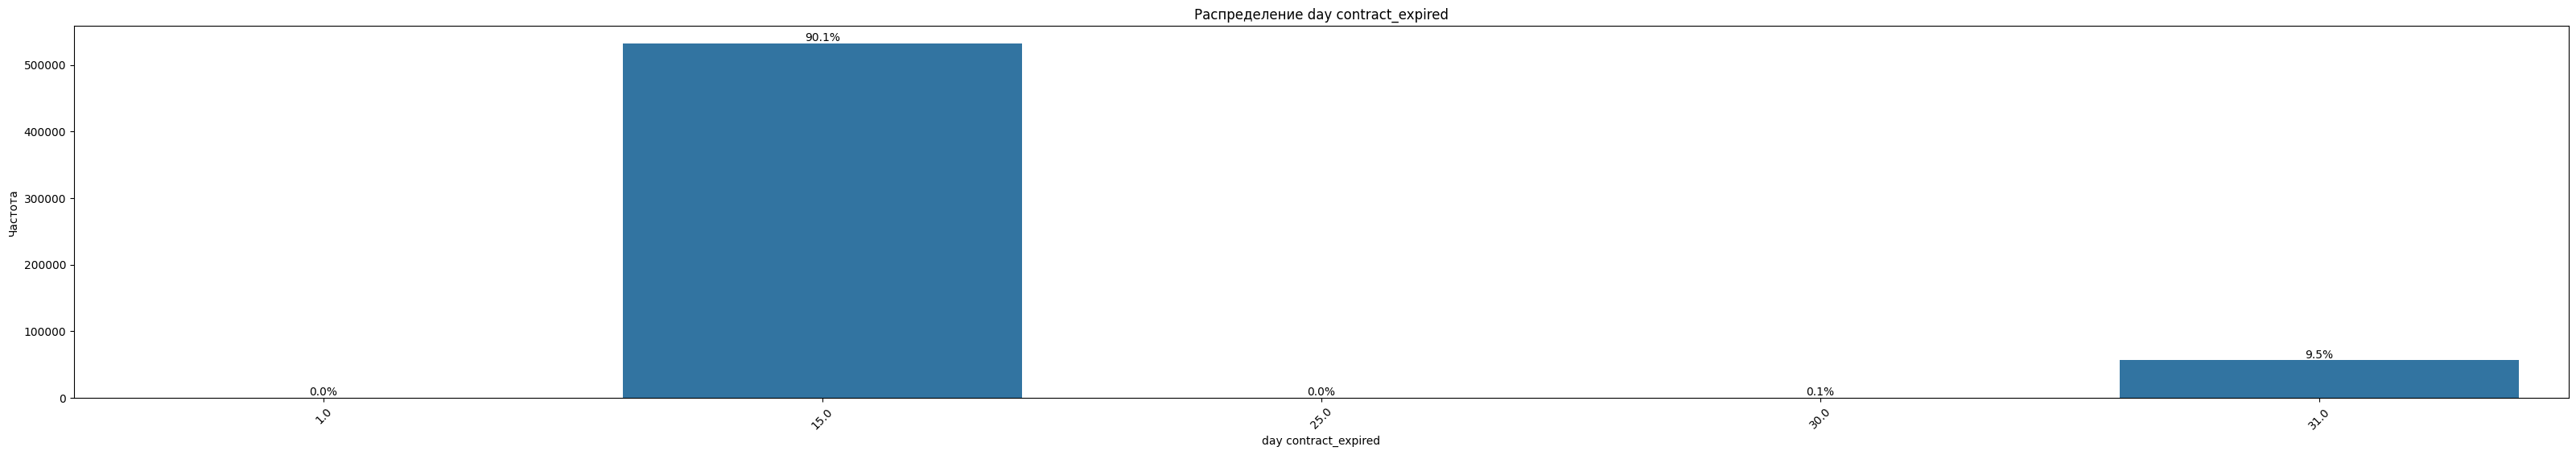

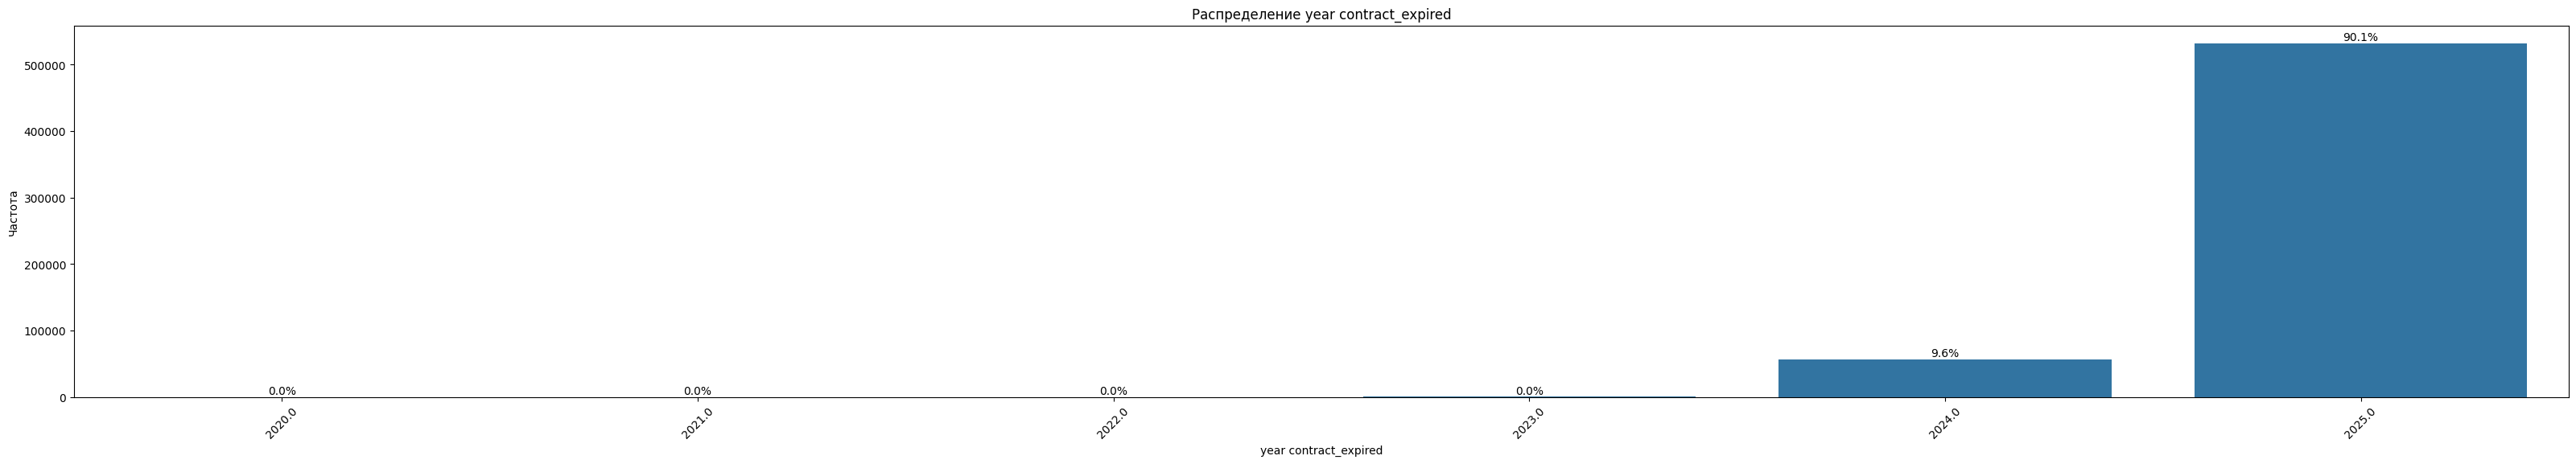

In [181]:
def add_percentage_labels(ax):
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

categorical_columns = df.drop(['shipcall_departure', 'shipcall_receive', 'agent', 'counterparty_isct_name', 'counterparty_erp_name', 'manager_by_counterparty', 'consignee', 'consignee_original', 'consignor', 'import_consignor', 'cargo'], axis=1).select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(40, 6))
    ax = sns.countplot(data=df, x=column)
    add_percentage_labels(ax)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()

Пропуски

In [182]:
df.isnull().sum()

cnt_size                                 0
cnt_iso                                  0
cnt_type                               126
cnt_length                             126
is_laden                                 0
terminal_of_arrival                   2925
terminal_of_departure                    0
move_from                                4
move_from_direction                      0
move_to                                  0
move_to_direction                        0
drt_direct_arrival                       0
shipcall_receive                         0
shipcall_departure                       0
line_service_arrival                278436
line_service_departure              315164
port_of_loading                          0
country_of_loading                       0
port_of_destination                      0
country_of_destination                   0
rw_station_departure                     0
received_cnt_wagon_owner                 0
rw_station_destination                   0
agent      

Смотрим уникальные значения в колонках с пропусками

In [ ]:
columns_with_na = [col for col in df.columns if df[col].isnull().any()]

for col in columns_with_na:
    print(f'Уникальные значения в колонке "{col}":')
    print(df[col].unique())
    print('\n')

Заменяем везде на unknown2, тк в колонке  cnt_type уже есть unknown, который может иметь другой смысл

In [184]:
df.fillna('unknown2', inplace=True)

C:\Users\MPiskaev\AppData\Local\Temp\3\ipykernel_18624\4220811746.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('unknown2', inplace=True)


Декомпозируем признаки

In [185]:
def split_shipcall(shipcall):
    if shipcall == 'нет данных':
        return pd.Series([None, None, None])
    else:
        parts = shipcall.rsplit(' ', 1)
        vessel = parts[0]
        voyages = parts[1].split('/')
        return pd.Series([vessel, voyages[0], voyages[1]])

# Применение функции для shipcall_receive
df[['shipcall_receive_vessel', 'shipcall_receive_voyage1', 'shipcall_receive_voyage2']] = df['shipcall_receive'].apply(split_shipcall)

# Применение функции для shipcall_departure
df[['shipcall_departure_vessel', 'shipcall_departure_voyage1', 'shipcall_departure_voyage2']] = df['shipcall_departure'].apply(split_shipcall)

# Удаление старых признаков
df.drop(columns=['shipcall_receive', 'shipcall_departure'], inplace=True)



In [186]:
df['cnt_size'] = df['cnt_size'].astype('object')

In [188]:
df.dtypes

cnt_size                            object
cnt_iso                             object
cnt_type                            object
cnt_length                          object
is_laden                            object
terminal_of_arrival                 object
terminal_of_departure               object
move_from                           object
move_from_direction                 object
move_to                             object
move_to_direction                   object
drt_direct_arrival                  object
line_service_arrival                object
line_service_departure              object
port_of_loading                     object
country_of_loading                  object
port_of_destination                 object
country_of_destination              object
rw_station_departure                object
received_cnt_wagon_owner            object
rw_station_destination              object
agent                               object
line_operator                       object
counterpart

In [198]:
categorical_columns = df.drop('storage_days', axis=1).columns

for i in categorical_columns:
    df[i] = df[i].astype(str)

In [194]:
print(categorical_columns)

Index(['cnt_size', 'cnt_iso', 'cnt_type', 'cnt_length', 'is_laden',
       'terminal_of_arrival', 'terminal_of_departure', 'move_from',
       'move_from_direction', 'move_to', 'move_to_direction',
       'drt_direct_arrival', 'line_service_arrival', 'line_service_departure',
       'port_of_loading', 'country_of_loading', 'port_of_destination',
       'country_of_destination', 'rw_station_departure',
       'received_cnt_wagon_owner', 'rw_station_destination', 'agent',
       'line_operator', 'counterparty_isct_name', 'counterparty_erp_name',
       'manager_by_counterparty', 'contract_prefix', 'contract_status',
       'consignee', 'consignee_original', 'consignor', 'import_consignor',
       'cargo', 'dangerous_class', 'is_dangerous', 'month receive_date',
       'day receive_date', 'year receive_date', 'month departure_date',
       'day departure_date', 'year departure_date',
       'month departure_date_20_20', 'day departure_date_20_20',
       'year departure_date_20_20', 'mont

Важность признаков

RMSE: 2.9807968827590066
MAE: 2.2120078856746397
MAPE: 36.38932531789016


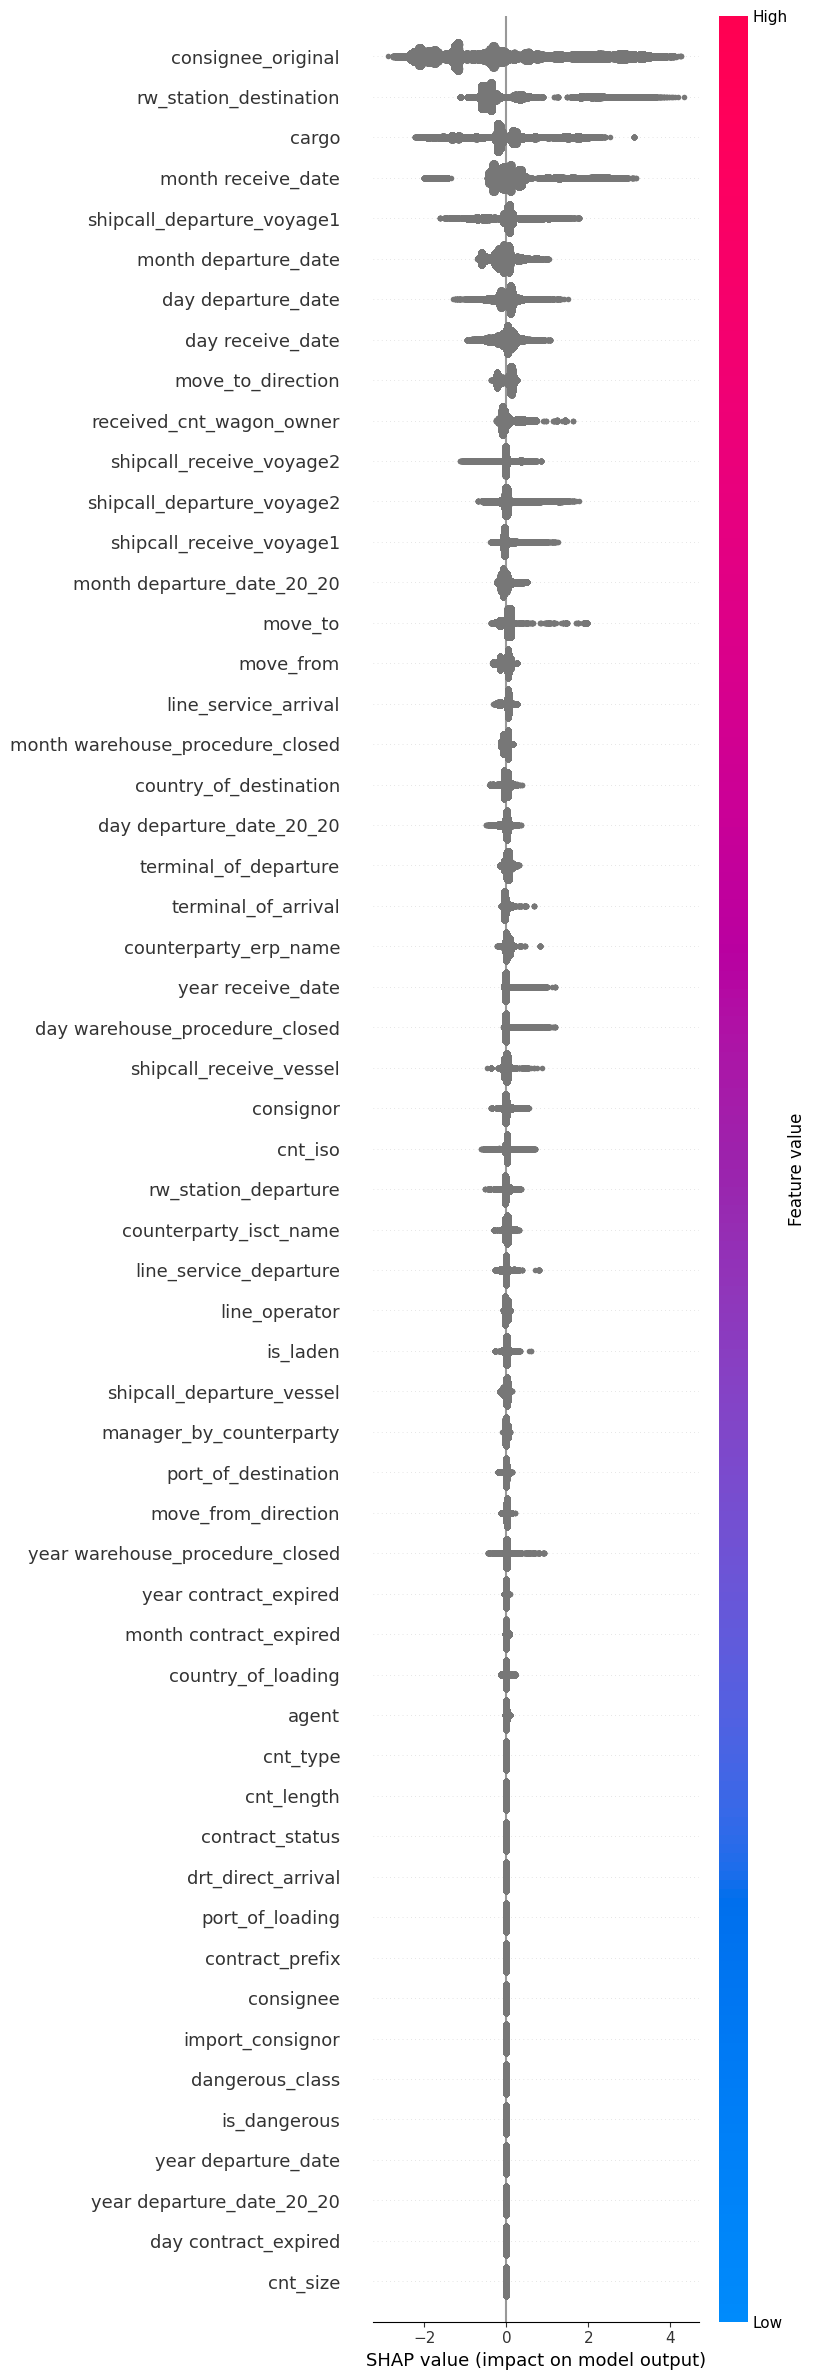

In [201]:
import numpy as np
import shap
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предполагаем, что у нас есть список всех категориальных признаков
categorical_features = ['cnt_size', 'cnt_iso', 'cnt_type', 'cnt_length', 'is_laden',
       'terminal_of_arrival', 'terminal_of_departure', 'move_from',
       'move_from_direction', 'move_to', 'move_to_direction',
       'drt_direct_arrival', 'line_service_arrival', 'line_service_departure',
       'port_of_loading', 'country_of_loading', 'port_of_destination',
       'country_of_destination', 'rw_station_departure',
       'received_cnt_wagon_owner', 'rw_station_destination', 'agent',
       'line_operator', 'counterparty_isct_name', 'counterparty_erp_name',
       'manager_by_counterparty', 'contract_prefix', 'contract_status',
       'consignee', 'consignee_original', 'consignor', 'import_consignor',
       'cargo', 'dangerous_class', 'is_dangerous', 'month receive_date',
       'day receive_date', 'year receive_date', 'month departure_date',
       'day departure_date', 'year departure_date',
       'month departure_date_20_20', 'day departure_date_20_20',
       'year departure_date_20_20', 'month warehouse_procedure_closed',
       'day warehouse_procedure_closed', 'year warehouse_procedure_closed',
       'month contract_expired', 'day contract_expired',
       'year contract_expired', 'shipcall_receive_vessel',
       'shipcall_receive_voyage1', 'shipcall_receive_voyage2',
       'shipcall_departure_vessel', 'shipcall_departure_voyage1',
       'shipcall_departure_voyage2']


# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['storage_days'])
y = df['storage_days']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели CatBoost
model = CatBoostRegressor(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    cat_features=categorical_features,
    verbose=False
)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
rmse = np.sqrt(mean_squared_error(y_test, np.round(y_pred, 0)))
mae = mean_absolute_error(y_test, np.round(y_pred, 0))
mape = np.mean(np.abs((y_test - np.round(y_pred, 0)) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

# Использование SHAP для расчета значений Шепли
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Визуализация важности признаков
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, max_display =len(X_test.columns))

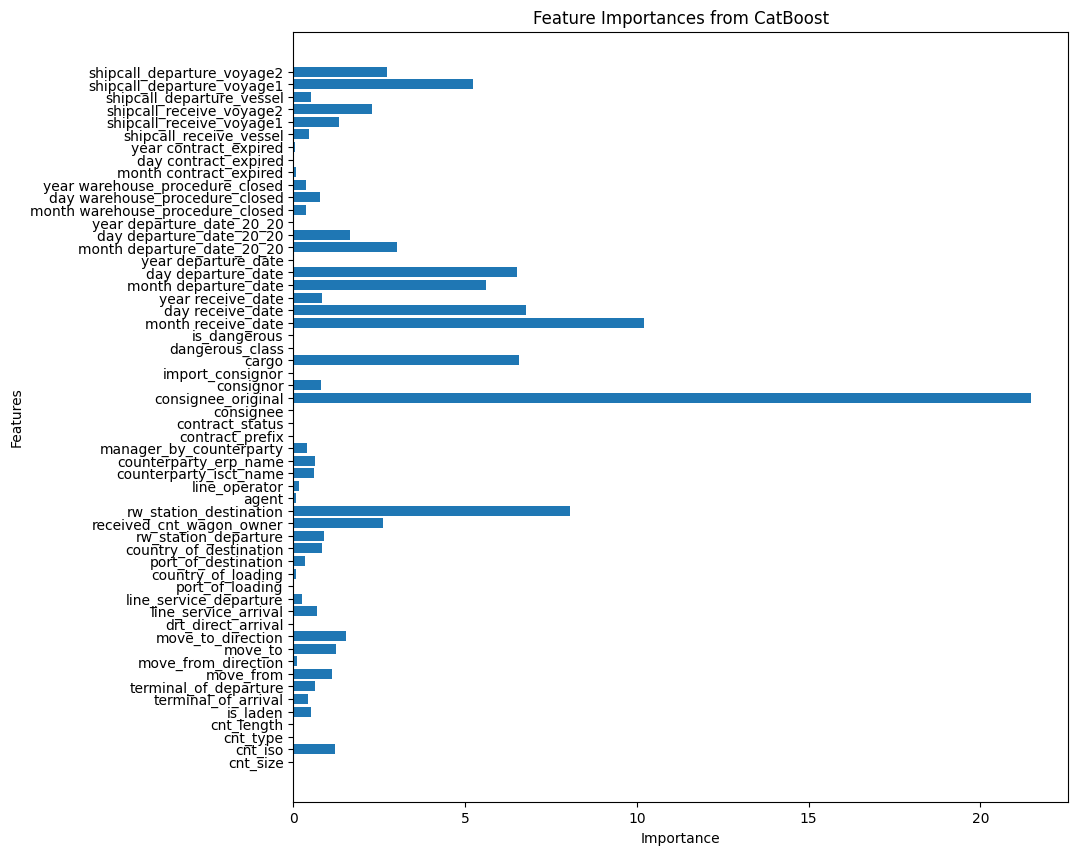

Значимые признаки: Index(['cnt_iso', 'is_laden', 'terminal_of_arrival', 'terminal_of_departure',
       'move_from', 'move_from_direction', 'move_to', 'move_to_direction',
       'line_service_arrival', 'line_service_departure', 'country_of_loading',
       'port_of_destination', 'country_of_destination', 'rw_station_departure',
       'received_cnt_wagon_owner', 'rw_station_destination', 'agent',
       'line_operator', 'counterparty_isct_name', 'counterparty_erp_name',
       'manager_by_counterparty', 'consignee_original', 'consignor', 'cargo',
       'month receive_date', 'day receive_date', 'year receive_date',
       'month departure_date', 'day departure_date',
       'month departure_date_20_20', 'day departure_date_20_20',
       'month warehouse_procedure_closed', 'day warehouse_procedure_closed',
       'year warehouse_procedure_closed', 'month contract_expired',
       'year contract_expired', 'shipcall_receive_vessel',
       'shipcall_receive_voyage1', 'shipcall_receive_v

C:\Users\MPiskaev\AppData\Local\Temp\3\ipykernel_18624\1777146906.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant['storage_days'] =  df['storage_days']


In [204]:
from catboost import Pool

# Оценка важности признаков
feature_importances = model.get_feature_importance(Pool(X_train, label=y_train, cat_features=categorical_features))
feature_names = X_train.columns

# Визуализация важности признаков
plt.figure(figsize=(10, 10))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from CatBoost')
plt.show()


threshold = 0.01

# Отбор значимых признаков
significant_features = feature_names[feature_importances > threshold]

print("Значимые признаки:", significant_features)

# Создание нового датафрейма только со значимыми признаками
df_significant = df[significant_features] 
df_significant['storage_days'] =  df['storage_days']

Стандартизация

In [206]:

categorical_features_sign = ['cnt_iso', 'is_laden', 'terminal_of_arrival', 'terminal_of_departure',
       'move_from', 'move_from_direction', 'move_to', 'move_to_direction',
       'line_service_arrival', 'line_service_departure', 'country_of_loading',
       'port_of_destination', 'country_of_destination', 'rw_station_departure',
       'received_cnt_wagon_owner', 'rw_station_destination', 'agent',
       'line_operator', 'counterparty_isct_name', 'counterparty_erp_name',
       'manager_by_counterparty', 'consignee_original', 'consignor', 'cargo',
       'month receive_date', 'day receive_date', 'year receive_date',
       'month departure_date', 'day departure_date',
       'month departure_date_20_20', 'day departure_date_20_20',
       'month warehouse_procedure_closed', 'day warehouse_procedure_closed',
       'year warehouse_procedure_closed', 'month contract_expired',
       'year contract_expired', 'shipcall_receive_vessel',
       'shipcall_receive_voyage1', 'shipcall_receive_voyage2',
       'shipcall_departure_vessel', 'shipcall_departure_voyage1',
       'shipcall_departure_voyage2']

df_significant[categorical_features_sign] = df_significant[categorical_features_sign].astype('category')

df_significant[categorical_features_sign] = df_significant[categorical_features_sign].apply(lambda x: x.cat.codes)

C:\Users\MPiskaev\AppData\Local\Temp\3\ipykernel_18624\3486263159.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant[categorical_features_sign] = df_significant[categorical_features_sign].astype('category')
C:\Users\MPiskaev\AppData\Local\Temp\3\ipykernel_18624\3486263159.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant[categorical_features_sign] = df_significant[categorical_features_sign].apply(lambda x: x.cat.codes)


Моделирование

In [241]:
df_significant.dtypes

cnt_iso                             category
is_laden                            category
terminal_of_arrival                 category
terminal_of_departure               category
move_from                           category
move_from_direction                 category
move_to                             category
move_to_direction                   category
line_service_arrival                category
line_service_departure              category
country_of_loading                  category
port_of_destination                 category
country_of_destination              category
rw_station_departure                category
received_cnt_wagon_owner            category
rw_station_destination              category
agent                               category
line_operator                       category
counterparty_isct_name              category
counterparty_erp_name               category
manager_by_counterparty             category
consignee_original                  category
consignor 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
import random


# Преобразование категориальных признаков
categorical_features = ['cnt_iso', 'is_laden', 'terminal_of_arrival', 'terminal_of_departure',
       'move_from', 'move_from_direction', 'move_to', 'move_to_direction',
       'line_service_arrival', 'line_service_departure', 'country_of_loading',
       'port_of_destination', 'country_of_destination', 'rw_station_departure',
       'received_cnt_wagon_owner', 'rw_station_destination', 'agent',
       'line_operator', 'counterparty_isct_name', 'counterparty_erp_name',
       'manager_by_counterparty', 'consignee_original', 'consignor', 'cargo',
       'month receive_date', 'day receive_date', 'year receive_date',
       'month departure_date', 'day departure_date',
       'month departure_date_20_20', 'day departure_date_20_20',
       'month warehouse_procedure_closed', 'day warehouse_procedure_closed',
       'year warehouse_procedure_closed', 'month contract_expired',
       'year contract_expired', 'shipcall_receive_vessel',
       'shipcall_receive_voyage1', 'shipcall_receive_voyage2',
       'shipcall_departure_vessel', 'shipcall_departure_voyage1',
       'shipcall_departure_voyage2']

for col in categorical_features:
    if col in df_significant.columns:
        df_significant[col] = df_significant[col].astype(str).astype('category')

# Разделение данных на признаки и целевую переменную
X = df_significant.drop(columns=['storage_days'])
y = df_significant['storage_days']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [237]:
# Определение моделей и гиперпараметров
models_params = {
    'CatBoost': {
        'model': CatBoostRegressor,
        'params': {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'XGBoost': {
        'model': XGBRegressor,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMRegressor,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}


In [238]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return rmse, mae, mape

In [239]:
# Функция для тестирования моделей
def test_models(models_params, X_train, y_train, X_test, y_test, iterations=3):
    results = {}
    
    for model_name, model_info in models_params.items():
        print(f"Testing {model_name}")
        model_class = model_info['model']
        param_distributions = model_info['params']
        
        for i in range(iterations):
            print(f"Iteration {i+1} for {model_name}")
            param_sample = list(ParameterSampler(param_distributions, n_iter=1, random_state=random.randint(0, 10000)))[0]
            print(f"Parameters: {param_sample}")
            
            if model_name == 'CatBoost':
                model = model_class(cat_features=categorical_features, **param_sample, verbose=0)
            else:
                model = model_class(**param_sample)
            
            model.fit(X_train, y_train)
            
            rmse, mae, mape = evaluate_model(model, X_test, y_test)
            print(f"Results - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")
            
            if model_name not in results:
                results[model_name] = []
            results[model_name].append((param_sample, rmse, mae, mape))
    
    return results

In [ ]:
# Тестирование моделей
results = test_models(models_params, X_train, y_train, X_test, y_test)

# Вывод результатов
for model_name, model_results in results.items():
    print(f"\n{model_name} Results:")
    for result in model_results:
        params, rmse, mae, mape = result
        print(f"Parameters: {params}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
import random


# Преобразование категориальных признаков в строки
categorical_features = ['cnt_iso', 'is_laden', 'terminal_of_arrival', 'terminal_of_departure',
       'move_from', 'move_from_direction', 'move_to', 'move_to_direction',
       'line_service_arrival', 'line_service_departure', 'country_of_loading',
       'port_of_destination', 'country_of_destination', 'rw_station_departure',
       'received_cnt_wagon_owner', 'rw_station_destination', 'agent',
       'line_operator', 'counterparty_isct_name', 'counterparty_erp_name',
       'manager_by_counterparty', 'consignee_original', 'consignor', 'cargo',
       'month receive_date', 'day receive_date', 'year receive_date',
       'month departure_date', 'day departure_date',
       'month departure_date_20_20', 'day departure_date_20_20',
       'month warehouse_procedure_closed', 'day warehouse_procedure_closed',
       'year warehouse_procedure_closed', 'month contract_expired',
       'year contract_expired', 'shipcall_receive_vessel',
       'shipcall_receive_voyage1', 'shipcall_receive_voyage2',
       'shipcall_departure_vessel', 'shipcall_departure_voyage1',
       'shipcall_departure_voyage2']

for col in categorical_features:
    if col in df_significant.columns:
        df_significant[col] = df_significant[col].astype('category')

# Преобразование категориальных признаков в числовые коды
for col in categorical_features:
    if col in df_significant.columns:
        df_significant[col] = df_significant[col].cat.codes

# Разделение данных на признаки и целевую переменную
X = df_significant.drop(columns=['storage_days'])
y = df_significant['storage_days']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return rmse, mae, mape

# Определение моделей и гиперпараметров
models_params = {
    'CatBoost': {
        'model': CatBoostRegressor,
        'params': {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'XGBoost': {
        'model': XGBRegressor,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMRegressor,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Функция для тестирования моделей
def test_models(models_params, X_train, y_train, X_test, y_test, iterations=3):
    results = {}
    
    for model_name, model_info in models_params.items():
        print(f"Testing {model_name}")
        model_class = model_info['model']
        param_distributions = model_info['params']
        
        for i in range(iterations):
            print(f"Iteration {i+1} for {model_name}")
            param_sample = list(ParameterSampler(param_distributions, n_iter=1, random_state=random.randint(0, 10000)))[0]
            print(f"Parameters: {param_sample}")
            
            if model_name == 'CatBoost':
                model = model_class(cat_features=categorical_features, **param_sample, verbose=0)
            else:
                model = model_class(**param_sample)
            
            model.fit(X_train, y_train)
            
            rmse, mae, mape = evaluate_model(model, X_test, y_test)
            print(f"Results - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")
            
            if model_name not in results:
                results[model_name] = []
            results[model_name].append((param_sample, rmse, mae, mape))
    
    return results

# Тестирование моделей
results = test_models(models_params, X_train, y_train, X_test, y_test)

# Вывод результатов
for model_name, model_results in results.items():
    print(f"\n{model_name} Results:")
    for result in model_results:
        params, rmse, mae, mape = result
        print(f"Parameters: {params}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")